### Analyse Simulation Output with PPO and Different Reward Functions

### Imports & Installations

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import ast
from ast import literal_eval
from scipy.stats import pearsonr

### Initial Tests

In [3]:
# define folder to gaher data from
inputdir = '../src/data/model_outputs/'

In [ ]:
for file in os.listdir(inputdir):
    main_df = pd.DataFrame()
    main_df = pd.read_csv(inputdir + file)
    main_df = main_df[['step', 'system_total_waiting_time']]
    plt.size = (30, 20)
    plt.xlabel('Time step (seconds)')
    plt.ylabel('Total waiting time (s)')
    plt.plot(main_df['step'], main_df['system_total_waiting_time'])
    plt.legend(['ep1', 'ep2', 'ep3', 'ep4', 'ep5', 'ep6', 'ep7', 'ep8', 'ep9', 'ep10'])
plt.show()

In [16]:
episode1 = pd.read_csv(inputdir + 'ppo_withPT_conn0_ep1.csv')


step  system_total_stopped  system_total_waiting_time   
0       0.0                     0                        0.0  \
1       5.0                    12                        1.0   
2      10.0                    13                        8.0   
3      15.0                    20                       33.0   
4      20.0                    19                       72.0   
..      ...                   ...                        ...   
196   980.0                  6443                  1059044.0   
197   985.0                  6519                  1066929.0   
198   990.0                  6581                  1077524.0   
199   995.0                  6527                  1086726.0   
200  1000.0                  6535                  1094604.0   

     system_mean_waiting_time  system_mean_speed   
0                    0.000000           0.000000  \
1                    0.021277           3.343570   
2                    0.080000           5.200692   
3                    0.215686           5.431543   
4                    0.356436           5.862870   
..                        ...                ...   
196                130.456270           0.982325   
197                130.783158           0.971119   
198                131.597948           0.951038   
199                132.253377           0.979826   
200                132.438475           1.007926   

     cluster_1743822458_1743822558_1743822643_1743822689_1743822737_8039877991_cluster_1120310798_1634545540_1665161322_1665161338_1665161344_1743822496_1743822510_1743822551_1743822648_1743822650_1743822666_1743822667_1743822676_1743822687_1754245066_1756301705_1949670169_2004844603_297701075_412123597_412123598_412123601_412181181_stopped   
0                                                    0                                                                                                                                                                                                                                                                                                  \
1                                                    0                                                                                                                                                                                                                                                                                                   
2                                                    0                                                                                                                                                                                                                                                                                                   
3                                                    0                                                                                                                                                                                                                                                                                                   
4                                                    0                                                                                                                                                                                                                                                                                                   
..                                                 ...                                                                                                                                                                                                                                                                                                   
196                                                 77                                                                                                                                         

In [22]:
episode1.system_total_waiting_time.mean()

285453.144278607

### Stable Baselines 3 PPO Output

In [2]:
# define folder to gaher data from
inputdir = '../src/data/model_outputs/'

['ep76']


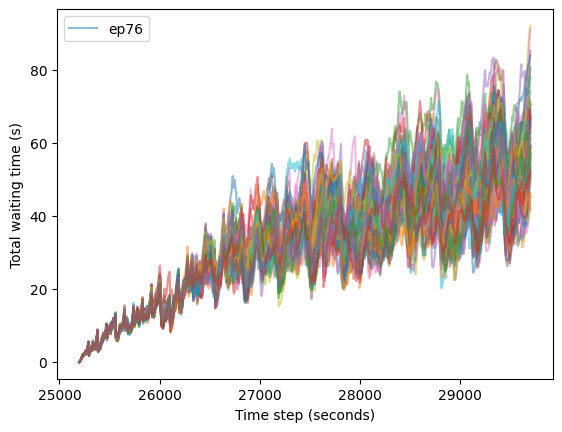

In [30]:
i = 0
for file in os.listdir(inputdir):
    if file.startswith('waitingTime'):
        i += 1
        main_df = pd.DataFrame()
        main_df = pd.read_csv(inputdir + file)
        main_df = main_df[['step', 'system_mean_waiting_time']]
        plt.size = (30, 20)
        plt.xlabel('Time step (seconds)')
        plt.ylabel('Total waiting time (s)')
        plt.plot(main_df['step'], main_df['system_mean_waiting_time'], alpha=0.5)
        legend_list = []
        #print(i)
        legend_list.append(f'ep{i}')
print(legend_list)
plt.legend(legend_list)#['ep1', 'ep2', 'ep3', 'ep4', 'ep5', 'ep6', 'ep7', 'ep8'])
plt.show()

In [17]:
for file in os.listdir(inputdir):
    if file.startswith('waitingTime'):
        i += 1
        main_df = pd.DataFrame()
        main_df = pd.read_csv(inputdir + file)

In [76]:
main_df

step  system_total_stopped  system_total_waiting_time  \
0     25200.0                     0                        0.0   
1     25205.0                     3                        1.0   
2     25210.0                     3                        6.0   
3     25215.0                     3                       15.0   
4     25220.0                     4                       26.0   
...       ...                   ...                        ...   
5756  53980.0                 14461                  3392946.0   
5757  53985.0                 14467                  3396472.0   
5758  53990.0                 14480                  3393019.0   
5759  53995.0                 14533                  3397580.0   
5760  54000.0                 14572                  3403376.0   

      system_mean_waiting_time  system_mean_speed  system_total_CO2  \
0                     0.000000           0.000000      0.000000e+00   
1                     0.100000           3.174046      4.247253e+04   
2                     0.333333           4.543489      1.066634e+05   
3                     0.600000           6.285408      1.838540e+05   
4                     0.787879           5.624030      1.451824e+05   
...                        ...                ...               ...   
5756                224.134364           0.112172      4.630270e+07   
5757                224.456252           0.110324      4.629140e+07   
5758                224.228060           0.109989      4.630616e+07   
5759                224.396011           0.099727      4.631744e+07   
5760                224.793659           0.091290      4.619292e+07   

      system_total_PMx  system_total_NOx  system_total_noise_emission  \
0             0.000000          0.000000                     0.000000   
1             5.852833        246.907245                   513.962741   
2            14.097243        657.641744                   965.304712   
3            21.867242       1074.700680                  1388.206485   
4            18.597625        825.847388                  1728.170164   
...                ...               ...                          ...   
5756       6643.151926     240498.664715                757070.485976   
5757       6640.512809     240265.322574                756805.496195   
5758       6643.609306     240263.658815                756921.269440   
5759       6649.011542     240433.244825                756922.093988   
5760       6632.749277     239437.878396                756847.087528   

      system_local_CO2  ...  tls_161_accumulated_waiting_time  \
0             0.000000  ...                               0.0   
1             0.000000  ...                               0.0   
2             0.000000  ...                               0.0   
3             0.000000  ...                               0.0   
4             0.000000  ...                               0.0   
...                ...  ...                               ...   
5756     478468.959253  ...                           17808.0   
5757     479192.772127  ...                           17808.0   
5758     476663.605095  ...                           17808.0   
5759     474797.148138  ...                           17808.0   
5760     481537.063989  ...                           17808.0   

      tls_161_average_speed  tls_161_braking  \
0                       1.0              0.0   
1                       1.0              0.0   
2                       1.0              0.0   
3                       1.0              0.0   
4                       1.0              0.0   
...                     ...              ...   
5756                    0.0              0.0   
5757                    0.0              0.0   
5758                    0.0              0.0   
5759                    0.0              0.0   
5760                    0.0              0.0   

                       tls_161_controlled_lane_emission  tls_161_phase  \
0                                                    [

In [33]:
main_df.dtypes

step                                     float64
system_total_stopped                       int64
system_total_waiting_time                float64
system_mean_waiting_time                 float64
system_mean_speed                        float64
system_total_CO2                         float64
system_total_PMx                         float64
system_total_NOx                         float64
system_total_noise_emission              float64
system_local_CO2                         float64
system_local_PMx                         float64
system_local_NOx                         float64
system_local_noise_emission              float64
system_local_avg_speed                   float64
system_last_reward                       float64
total_brake_traffic_signals              float64
tls_159_stopped                            int64
tls_159_accumulated_waiting_time         float64
tls_159_average_speed                    float64
tls_159_braking                          float64
tls_159_controlled_l

In [42]:
test['tls_159_controlled_lane_emission'] = main_df['tls_159_controlled_lane_emission'].apply(ast.literal_eval)

In [43]:
new = test['tls_159_controlled_lane_emission'].apply(pd.Series)

In [64]:
#new = new.dropna(how='all')
new = new.drop_duplicates()

CO2_emission   CO_emission  HC_emission  PMx_emission  NOx_emission  \
17     60120.824096     79.541593     0.000000      9.473628    505.092386   
18     66339.651789     85.805827     0.000000     10.010790    543.964816   
19     40878.259765     57.430820     0.000000      6.912087    343.879090   
37      7647.466555    103.226585     0.653466      0.150184      3.208589   
38      3518.651937      0.000000     0.000000      0.000567      0.856114   
...             ...           ...          ...           ...           ...   
5743  330166.001572  10029.838388    65.812696     60.852381   2176.827703   
5744  330037.554716  10013.195384    65.733185     60.844565   2176.744975   
5745  330165.247975  10029.721440    65.812141     60.852329   2176.827188   
5746  330166.111111  10029.855556    65.812778     60.852389   2176.827778   
5760  361388.711063  10112.475454    86.436411     69.371827   2472.336524   

      emission_combined  fuel_consumption  
17         12142.986340      18912.493444  
18         13395.886644      20868.685845  
19          8257.296352      12858.907625  
37          1550.941076       2439.165493  
38           703.901723       1122.319534  
...                 ...               ...  
5743       68499.866548     104538.853947  
5744       68470.814565     104497.881841  
5745       68499.692215     104538.613558  
5746       68499.891922     104538.888889  
5760       74825.866256     114415.870679  

[3424 rows x 7 columns]

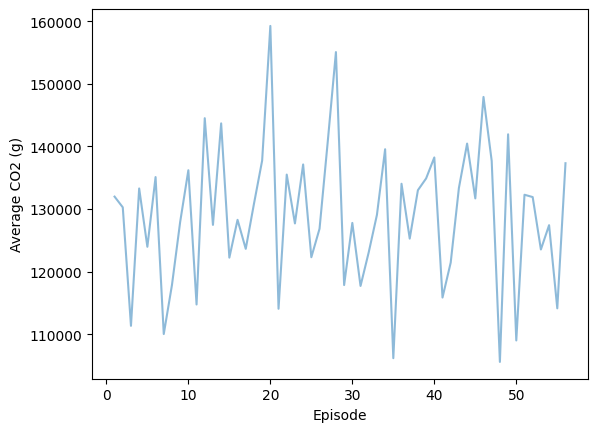

In [ ]:
import numpy as np

tls_159 = pd.DataFrame()
inputdir = '../src/data/model_outputs/'

# Initialize a list to store average CO2 emissions for each episode
avg_co2_emissions = []

for i, file in enumerate(os.listdir(inputdir)):
    if file.startswith('queue'):
        main_df = pd.DataFrame()
        main_df = pd.read_csv(inputdir + file)
        tls_159['tls_159_controlled_lane_emission'] = main_df['tls_159_controlled_lane_emission'].apply(ast.literal_eval)
        tls_159 = tls_159['tls_159_controlled_lane_emission'].apply(pd.Series)
        tls_159['step'] = main_df['step']
        tls_159 = tls_159.dropna(how='all')
        
        # Calculate the average CO2 emission for this episode and add it to the list
        avg_co2_emissions.append(np.mean(tls_159['CO2_emission']))

# Plot the average CO2 emissions for each episode
#plt.figure(figsize=(60, 20))
plt.plot(range(1, len(avg_co2_emissions) + 1), avg_co2_emissions, alpha=0.5)
plt.xlabel('Episode')
plt.ylabel('Average CO2 (g)')
plt.show()

In [47]:
def plot_columns(df):
    plt.figure(figsize=(10,6))
    
    for column in df.columns:
        plt.plot(df.index, df[column], label=column)
    
    plt.xlabel('Time Steps')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

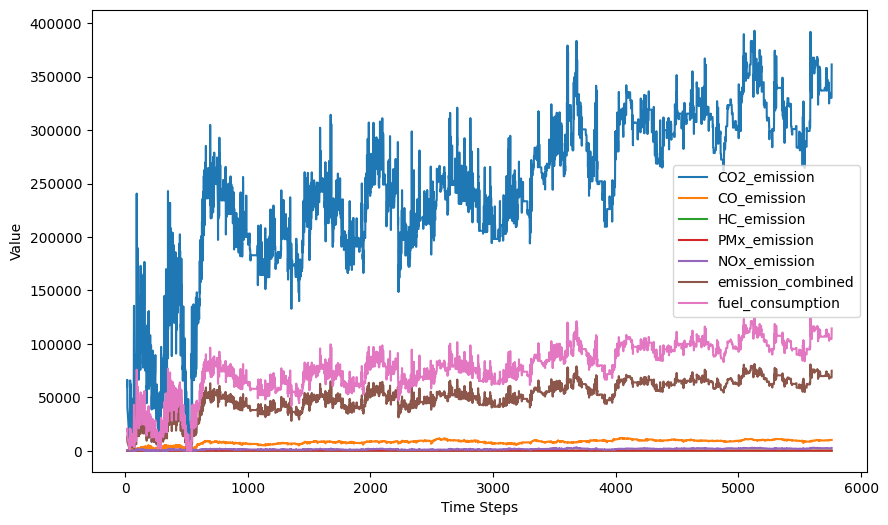

In [66]:
plot_columns(new)


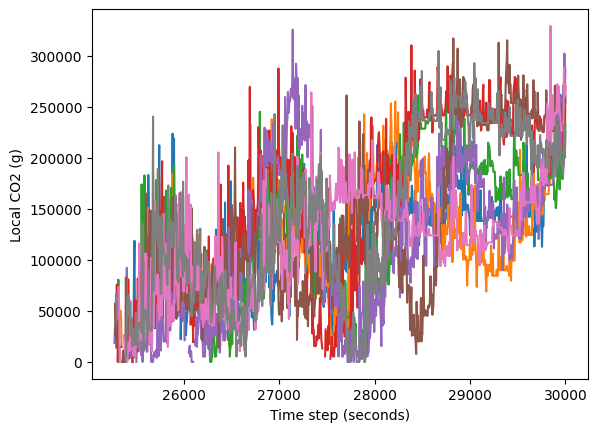

In [74]:
# plot local tls CO2 emission for each episode

tls_159 = pd.DataFrame()

inputdir = '../src/data/model_outputs/'

for file in os.listdir(inputdir):
    if file.startswith('waitingTime'):
        main_df = pd.DataFrame()
        main_df = pd.read_csv(inputdir + file)
        main_df = main_df[main_df['step']<=30000]
        tls_159['tls_159_controlled_lane_emission'] = main_df['tls_159_controlled_lane_emission'].apply(ast.literal_eval)
        tls_159 = tls_159['tls_159_controlled_lane_emission'].apply(pd.Series)
        tls_159['step'] = main_df['step']
        tls_159 = tls_159.dropna(how='all')
        plt.size = (60, 20)
        plt.xlabel('Time step (seconds)')
        plt.ylabel('Local CO2 (g)')
        # for column in tls_159.columns:
        #     plt.plot(tls_159.index, tls_159[column])
        plt.plot(tls_159['step'], tls_159['CO2_emission'])
        # legend_list = []
        # print(i)
        # legend_list.append(f'ep{i}')
        # plt.legend(['ep1', 'ep2', 'ep3', 'ep4', 'ep5', 'ep6', 'ep7', 'ep8'])
plt.show()

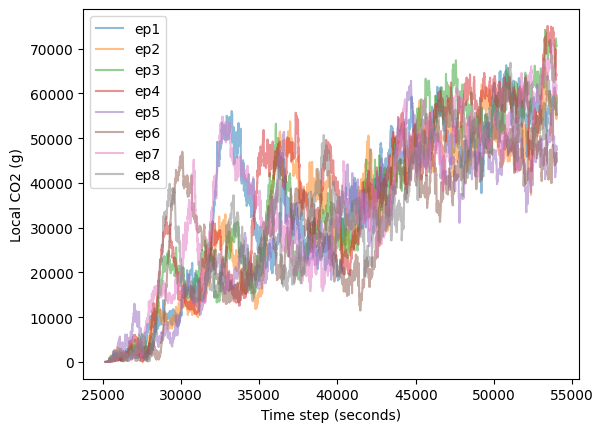

In [75]:
# plot local tls CO2 emission for each episode

tls_159 = pd.DataFrame()

inputdir = '../src/data/model_outputs/'

for file in os.listdir(inputdir):
    if file.startswith('waitingTime'):
        main_df = pd.DataFrame()
        main_df = pd.read_csv(inputdir + file)
        #tls_159['tls_159_reward'] = main_df['tls_159_controlled_lane_emission'].apply(ast.literal_eval)
        #tls_159 = tls_159['tls_159_controlled_lane_emission'].apply(pd.Series)
        #tls_159['steps'] = main_df['step']
        #tls_159 = tls_159.dropna(how='all')
        plt.size = (60, 20)
        plt.xlabel('Time step (seconds)')
        plt.ylabel('Local CO2 (g)')
        # for column in tls_159.columns:
        #     plt.plot(tls_159.index, tls_159[column])
        plt.plot(main_df['step'], main_df['agents_total_accumulated_waiting_time'], alpha=0.5)
        # legend_list = []
        # print(i)
        # legend_list.append(f'ep{i}')
        plt.legend(['ep1', 'ep2', 'ep3', 'ep4', 'ep5', 'ep6', 'ep7', 'ep8'])
plt.show()

In [ ]:
# queue data

# plot local tls CO2 emission for each episode

tls_159 = pd.DataFrame()

inputdir = '../src/data/model_outputs/'

for file in os.listdir(inputdir):
    if file.startswith('queue'):
        main_df = pd.DataFrame()
        main_df = pd.read_csv(inputdir + file)
        #main_df = main_df[main_df['step']<=30000]
        tls_159['tls_159_controlled_lane_emission'] = main_df['tls_159_controlled_lane_emission'].apply(ast.literal_eval)
        tls_159 = tls_159['tls_159_controlled_lane_emission'].apply(pd.Series)
        tls_159['step'] = main_df['step']
        tls_159 = tls_159.dropna(how='all')
        plt.size = (60, 20)
        plt.xlabel('Time step (seconds)')
        plt.ylabel('Local CO2 (g)')
        # for column in tls_159.columns:
        #     plt.plot(tls_159.index, tls_159[column])
        plt.plot(tls_159['step'], tls_159['CO2_emission'], alpha=0.5)
        # legend_list = []
        # print(i)
        # legend_list.append(f'ep{i}')
        # plt.legend(['ep1', 'ep2', 'ep3', 'ep4', 'ep5', 'ep6', 'ep7', 'ep8'])
plt.show()

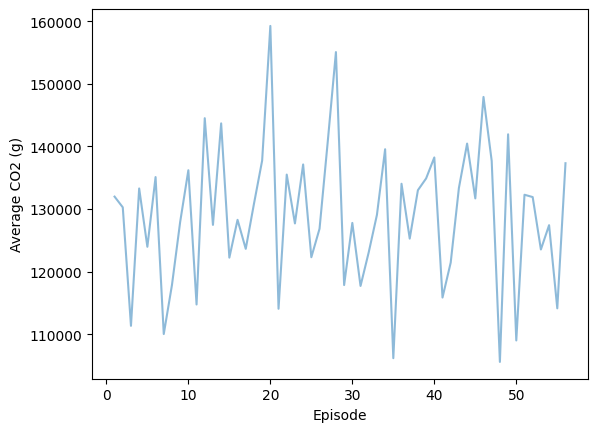

In [81]:
import numpy as np

tls_159 = pd.DataFrame()
inputdir = '../src/data/model_outputs/'

# Initialize a list to store average CO2 emissions for each episode
avg_co2_emissions = []

for i, file in enumerate(os.listdir(inputdir)):
    if file.startswith('queue'):
        main_df = pd.DataFrame()
        main_df = pd.read_csv(inputdir + file)
        tls_159['tls_159_controlled_lane_emission'] = main_df['tls_159_controlled_lane_emission'].apply(ast.literal_eval)
        tls_159 = tls_159['tls_159_controlled_lane_emission'].apply(pd.Series)
        tls_159['step'] = main_df['step']
        tls_159 = tls_159.dropna(how='all')
        
        # Calculate the average CO2 emission for this episode and add it to the list
        avg_co2_emissions.append(np.mean(tls_159['CO2_emission']))

# Plot the average CO2 emissions for each episode
#plt.figure(figsize=(60, 20))
plt.plot(range(1, len(avg_co2_emissions) + 1), avg_co2_emissions, alpha=0.5)
plt.xlabel('Episode')
plt.ylabel('Average CO2 (g)')
plt.show()

In [94]:
# view all columns in dataframe
pd.set_option('display.max_columns', None)

In [95]:
main_df

step  system_total_stopped  system_total_waiting_time  \
0    25200.0                     0                        0.0   
1    25205.0                     3                        1.0   
2    25210.0                     3                        6.0   
3    25215.0                     3                       16.0   
4    25220.0                     6                       31.0   
..       ...                   ...                        ...   
896  29680.0                   744                    60233.0   
897  29685.0                   774                    61374.0   
898  29690.0                   786                    61225.0   
899  29695.0                   792                    62013.0   
900  29700.0                   787                    62117.0   

     system_mean_waiting_time  system_mean_speed  system_total_CO2  \
0                    0.000000           0.000000      0.000000e+00   
1                    0.100000           3.606116      5.276023e+04   
2                    0.333333           5.068939      1.097898e+05   
3                    0.640000           6.582069      1.650968e+05   
4                    0.939394           5.813063      1.383185e+05   
..                        ...                ...               ...   
896                 43.869629           3.194744      5.161868e+06   
897                 44.733236           3.224940      5.247981e+06   
898                 44.592134           3.203477      5.324917e+06   
899                 45.133188           3.263358      4.996321e+06   
900                 45.473646           3.198953      5.281992e+06   

     system_total_PMx  system_total_NOx  system_total_noise_emission  \
0            0.000000          0.000000                     0.000000   
1            6.686134        297.342218                   524.453455   
2           14.001480        644.206052                   977.377044   
3           20.034734        977.316858                  1373.933181   
4           18.625524        818.267968                  1714.845639   
..                ...               ...                          ...   
896        731.936724      30390.235578                 70524.044444   
897        731.538384      30355.274478                 70504.761407   
898        751.713747      31236.786940                 70642.074395   
899        702.752555      28552.063848                 70704.234580   
900        747.132372      30919.065460                 70151.044104   

     system_local_CO2  system_local_PMx  system_local_NOx  \
0            0.000000          0.000000          0.000000   
1            0.000000          0.000000          0.000000   
2            0.000000          0.000000          0.000000   
3            0.000000          0.000000          0.000000   
4            0.000000          0.000000          0.000000   
..                ...               ...               ...   
896     137363.663654         21.156066        838.289975   
897     144636.805229         21.616449        869.707722   
898     108060.108803         15.135731        567.174004   
899      77705.393836          8.050092        291.575563   
900      94773.485168         12.363914        451.219860   

     system_local_noise_emission  system_local_avg_speed  system_last_reward  \
0                       0.000000                0.000000            0.000000   
1                       0.000000                0.000000            0.000000   
2                       0.000000                0.000000            0.000000   
3                       0.000000                0.000000            0.000000   
4                       0.000000                0.000000            0.000000   
..                           ...                     ...                 ...   
896                  1827.606540                0.250943          -10.000000   
897                  1956.084843                1.184340           -8.666667   
898                  1866.076152                1.007481           -

In [90]:

inputdir = '../src/data/model_outputs/'

# Initialize lists to store average CO2 emissions for each episode
avg_co2_emissions_159 = []
avg_co2_emissions_160 = []
avg_co2_emissions_161 = []
avg_sys_last_reward = []

for i, file in enumerate(os.listdir(inputdir)):
    if file.startswith('queue'):
        main_df = pd.read_csv(inputdir + file)
        
        # Add calculation for avg_sys_last_reward
        avg_sys_last_reward.append(main_df['system_last_reward'].mean())
        
        # Process tls_159
        tls_159 = pd.DataFrame()
        tls_159['tls_159_controlled_lane_emission'] = main_df['tls_159_controlled_lane_emission'].apply(ast.literal_eval)
        tls_159 = tls_159['tls_159_controlled_lane_emission'].apply(pd.Series)
        tls_159['step'] = main_df['step']
        tls_159 = tls_159.dropna(how='all')
        avg_co2_emissions_159.append(np.mean(tls_159['CO2_emission']))
        
        # Process tls_160
        tls_160 = pd.DataFrame()
        tls_160['tls_160_controlled_lane_emission'] = main_df['tls_160_controlled_lane_emission'].apply(ast.literal_eval)
        tls_160 = tls_160['tls_160_controlled_lane_emission'].apply(pd.Series)
        tls_160['step'] = main_df['step']
        tls_160 = tls_160.dropna(how='all')
        avg_co2_emissions_160.append(np.mean(tls_160['CO2_emission']))
        
        # Process tls_161
        tls_161 = pd.DataFrame()
        tls_161['tls_161_controlled_lane_emission'] = main_df['tls_161_controlled_lane_emission'].apply(ast.literal_eval)
        tls_161 = tls_161['tls_161_controlled_lane_emission'].apply(pd.Series)
        tls_161['step'] = main_df['step']
        tls_161 = tls_161.dropna(how='all')
        avg_co2_emissions_161.append(np.mean(tls_161['CO2_emission']))

# Plot the average CO2 emissions for each episode
plt.figure(figsize=(40, 20))
fig, ax1 = plt.subplots()

# Plot CO2 emissions on primary y-axis
ax1.plot(range(1, len(avg_co2_emissions_159) + 1), avg_co2_emissions_159, alpha=0.5, label='tls_159')
ax1.plot(range(1, len(avg_co2_emissions_160) + 1), avg_co2_emissions_160, alpha=0.5, label='tls_160')
ax1.plot(range(1, len(avg_co2_emissions_161) + 1), avg_co2_emissions_161, alpha=0.5, label='tls_161')

# Labels for first graph
ax1.set_xlabel('Episode')
ax1.set_ylabel('Average CO2 (g)')
ax1.legend(['tls_159', 'tls_160', 'tls_161'])

# Create secondary y-axis
ax2 = ax1.twinx()

# Plot system_last_reward on secondary y-axis
ax2.plot(avg_sys_last_reward, color='purple', linestyle='--', alpha=0.5, label='system_last_reward')

# Label for second graph
ax2.set_ylabel('Average System Reward')
ax2.legend(loc='upper right')

plt.show()


#plt.plot(range(1, len(avg_co2_emissions_159) + 1), avg_co2_emissions_159, alpha=0.5, label='tls_159')
#plt.plot(range(1, len(avg_co2_emissions_160) + 1), avg_co2_emissions_160, alpha=0.5, label='tls_160')
#plt.plot(range(1, len(avg_co2_emissions_161) + 1), avg_co2_emissions_161, alpha=0.5, label='tls_161')

#plt.xlabel('Episode')
#plt.ylabel('Average CO2 (g)')
#plt.legend(['tls_159', 'tls_160', 'tls_161'])
#plt.show()

<Figure size 4000x2000 with 0 Axes>

In [88]:
import numpy as np

inputdir = '../src/data/model_outputs/'

# Initialize dictionaries to store minimum emissions for each episode
min_emissions_159 = {'CO2_emission': float('inf'), 'CO_emission': float('inf'), 'HC_emission': float('inf'), 'PMx_emission': float('inf'), 'NOx_emission': float('inf')}
min_emissions_160 = {'CO2_emission': float('inf'), 'CO_emission': float('inf'), 'HC_emission': float('inf'), 'PMx_emission': float('inf'), 'NOx_emission': float('inf')}
min_emissions_161 = {'CO2_emission': float('inf'), 'CO_emission': float('inf'), 'HC_emission': float('inf'), 'PMx_emission': float('inf'), 'NOx_emission': float('inf')}

# Initialize dictionaries to store episode with minimum emissions for each tls
min_episode_159 = {}
min_episode_160 = {}
min_episode_161 = {}

for i, file in enumerate(os.listdir(inputdir)):
    if file.startswith('queue'):
        # Extract episode name from file name
        episode_name = file.split('_')[1]  # adjust this based on your file naming convention
        
        main_df = pd.read_csv(inputdir + file)
        
        # Process tls_159
        tls_159 = pd.DataFrame()
        tls_159['tls_159_controlled_lane_emission'] = main_df['tls_159_controlled_lane_emission'].apply(ast.literal_eval)
        tls_159 = tls_159['tls_159_controlled_lane_emission'].apply(pd.Series)
        tls_159['step'] = main_df['step']
        tls_159 = tls_159.dropna(how='all')
        
        # Update minimum emissions and corresponding episode for tls_159
        for emission in min_emissions_159.keys():
            min_value = np.min(tls_159[emission])
            if min_value < min_emissions_159[emission] and min_value > 0:
                min_emissions_159[emission] = min_value
                min_episode_159[emission] = episode_name
        
        # Process tls_160
        tls_160 = pd.DataFrame()
        tls_160['tls_160_controlled_lane_emission'] = main_df['tls_160_controlled_lane_emission'].apply(ast.literal_eval)
        tls_160 = tls_160['tls_160_controlled_lane_emission'].apply(pd.Series)
        tls_160['step'] = main_df['step']
        tls_160 = tls_160.dropna(how='all')
        
        # Update minimum emissions and corresponding episode for tls_160
        for emission in min_emissions_160.keys():
            min_value = np.min(tls_160[emission])
            if min_value < min_emissions_160[emission] and min_value > 0:
                min_emissions_160[emission] = min_value
                min_episode_160[emission] = episode_name
        
        # Process tls_161
        tls_161 = pd.DataFrame()
        tls_161['tls_161_controlled_lane_emission'] = main_df['tls_161_controlled_lane_emission'].apply(ast.literal_eval)
        tls_161 = tls_161['tls_161_controlled_lane_emission'].apply(pd.Series)
        tls_161['step'] = main_df['step']
        tls_161 = tls_161.dropna(how='all')
        
        # Update minimum emissions and corresponding episode for tls_161
        for emission in min_emissions_161.keys():
            min_value = np.min
            
    # Print minimum emissions and corresponding episodes
print('Minimum emissions for tls_159:', min_emissions_159)
print('Episodes with minimum emissions for tls_159:', min_episode_159)
print('Minimum emissions for tls_160:', min_emissions_160)
print('Episodes with minimum emissions for tls_160:', min_episode_160)
print('Minimum emissions for tls_161:', min_emissions_161)
print('Episodes with minimum emissions for tls_161:', min_episode_161)

Minimum emissions for tls_159: {'CO2_emission': 1345.1091843756267, 'CO_emission': 10.4170887758214, 'HC_emission': inf, 'PMx_emission': 0.002605111555797454, 'NOx_emission': 0.2635750819185546}
Episodes with minimum emissions for tls_159: {'CO2_emission': '200000', 'PMx_emission': '200000', 'NOx_emission': '200000', 'CO_emission': '200000'}
Minimum emissions for tls_160: {'CO2_emission': inf, 'CO_emission': inf, 'HC_emission': inf, 'PMx_emission': inf, 'NOx_emission': inf}
Episodes with minimum emissions for tls_160: {}
Minimum emissions for tls_161: {'CO2_emission': inf, 'CO_emission': inf, 'HC_emission': inf, 'PMx_emission': inf, 'NOx_emission': inf}
Episodes with minimum emissions for tls_161: {}


In [ ]:
inputdir = '../src/data/model_outputs/'

i = 1
df = pd.DataFrame()
for file in os.listdir(inputdir):
    if file.startswith('avg_speed'):
        # create dataframe for all files that start with avg_speed
        temp_df = pd.read_csv(os.path.join(inputdir, file))
        temp_df['episode'] = i
        df = df.append(temp_df, ignore_index=True)
        i += 1

In [6]:
df_grouped.system_last_reward

episode
1     0.335326
2     0.370231
3     0.335576
4     0.306631
5     0.305620
        ...   
79    0.310187
80    0.410490
81    0.417322
82    0.416298
83    0.399925
Name: system_last_reward, Length: 83, dtype: float64

In [5]:
# group dataframe by episode and get averages
df_grouped = df.groupby('episode').mean()

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_24997/4275623981.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby('episode').mean()


In [47]:
np.mean(df.system_local_CO2)

91988.95633249861

In [48]:
df.system_local_CO2.describe()

count     73199.000000
mean      91988.956332
std       55774.253360
min           0.000000
25%       52984.120075
50%       83283.678420
75%      120852.200323
max      395547.152681
Name: system_local_CO2, dtype: float64

<Figure size 4000x2000 with 0 Axes>

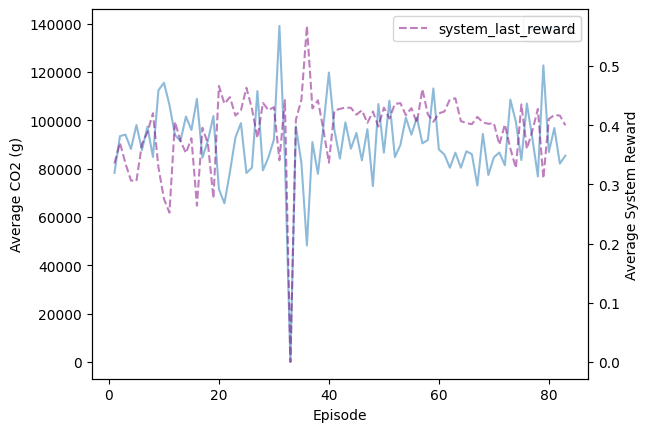

In [8]:
# plot local CO2 emission and last reward on two axis

# Plot the average CO2 emissions for each episode
plt.figure(figsize=(40, 20))
fig, ax1 = plt.subplots()

# Plot CO2 emissions on primary y-axis
ax1.plot(df_grouped['system_local_CO2'], alpha=0.5, label='CO2 emission')


# Labels for first graph
ax1.set_xlabel('Episode')
ax1.set_ylabel('Average CO2 (g)')
ax1.legend('Last Reward')

# Create secondary y-axis
ax2 = ax1.twinx()

# Plot system_last_reward on secondary y-axis
ax2.plot(df_grouped['system_last_reward'], color='purple', linestyle='--', alpha=0.5, label='system_last_reward')

# Label for second graph
ax2.set_ylabel('Average System Reward')
ax2.legend(loc='upper right')

plt.show()


In [ ]:
inputdir = '../src/data/model_outputs/'

i = 1
df_queue = pd.DataFrame()
for file in os.listdir(inputdir):
    if file.startswith('queue'):
        # create dataframe for all files that start with avg_speed
        temp_df_queue = pd.read_csv(os.path.join(inputdir, file))
        temp_df_queue['episode'] = i
        df_queue = df_queue.append(temp_df_queue, ignore_index=True)
        i += 1

In [11]:
grouped_queue = df_queue.groupby('episode').mean()

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_24997/3505794712.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_queue = df_queue.groupby('episode').mean()


In [20]:
grouped_queue.system_local_CO2.describe()

count        76.000000
mean      97832.340416
std       13453.162162
min       69311.025228
25%       87821.952537
50%       98123.148930
75%      103998.018390
max      138066.016280
Name: system_local_CO2, dtype: float64

<Figure size 4000x2000 with 0 Axes>

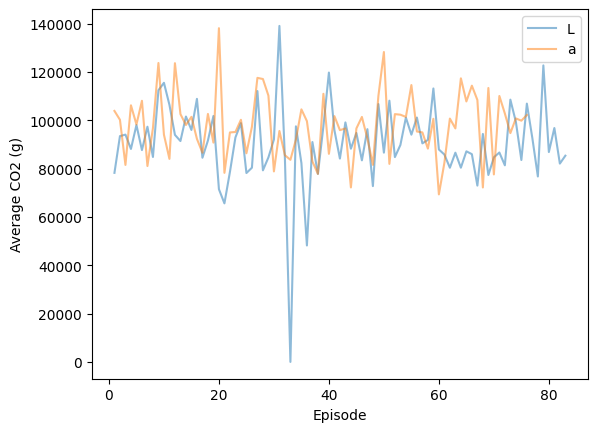

In [17]:
# plot local CO2 emission and last reward on two axis

# Plot the average CO2 emissions for each episode
plt.figure(figsize=(40, 20))
fig, ax1 = plt.subplots()

# Plot CO2 emissions on primary y-axis
ax1.plot(df_grouped['system_local_CO2'], alpha=0.5, label='speed CO2 emission')
ax1.plot(grouped_queue['system_local_CO2'], alpha=0.5, label='queue CO2 emission')


# Labels for first graph
ax1.set_xlabel('Episode')
ax1.set_ylabel('Average CO2 (g)')
ax1.legend('Last Reward')

# Create secondary y-axis
#ax2 = ax1.twinx()

# Plot system_last_reward on secondary y-axis
##ax2.plot(df_grouped['system_last_reward'], linestyle='--', alpha=0.5, label='speed_reward')
ax2.plot(grouped_queue['system_last_reward'], linestyle='--', alpha=0.5, label='queue_reward')

# Label for second graph
#ax2.set_ylabel('Average System Reward')
ax2.legend(loc='upper right')

plt.show()

In [39]:
# get episodes with highest reward and the respective local CO2 emission

df_grouped['system_local_CO2'][df_grouped['system_last_reward'] == df_grouped['system_last_reward'].max()]

episode
36    48171.403539
Name: system_local_CO2, dtype: float64

In [44]:
# get episodes with highest reward and the respective local CO2 emission

df_grouped['system_local_CO2'][df_grouped['system_last_reward'] == df_grouped['system_last_reward'].max()]

episode
36    48171.403539
Name: system_local_CO2, dtype: float64

In [40]:
# get episodes with highest reward and the respective local CO2 emission

grouped_queue['system_local_CO2'][grouped_queue['system_last_reward'] == grouped_queue['system_last_reward'].max()]

episode
60    69311.025228
Name: system_local_CO2, dtype: float64

#### Brake Reward

In [ ]:
inputdir = '../src/data/model_outputs/'

i = 1
df_brake = pd.DataFrame()
for file in os.listdir(inputdir):
    if file.startswith('minimizebrake'):
        # create dataframe for all files that start with avg_speed
        temp_df_brake = pd.read_csv(os.path.join(inputdir, file))
        temp_df_brake['episode'] = i
        df_brake = df_brake.append(temp_df_brake, ignore_index=True)
        i += 1

In [3]:
df_brake

step  system_total_stopped  system_total_waiting_time  \
0      25200.0                     0                        0.0   
1      25205.0                     3                        1.0   
2      25210.0                     4                        8.0   
3      25215.0                     3                       18.0   
4      25220.0                     6                       33.0   
...        ...                   ...                        ...   
67788  29680.0                     1                   223939.0   
67789  29685.0                     1                   226460.0   
67790  29690.0                     1                   228959.0   
67791  29695.0                     1                   228668.0   
67792  29700.0                     0                   229817.0   

       system_mean_waiting_time  system_mean_speed  system_total_CO2  \
0                      0.000000           0.000000      0.000000e+00   
1                      0.100000           3.581038      4.944388e+04   
2                      0.444444           5.309695      1.158864e+05   
3                      0.720000           6.573078      1.837692e+05   
4                      1.000000           5.745439      1.525943e+05   
...                         ...                ...               ...   
67788                102.395519           0.000000      7.702126e+06   
67789                103.453632           0.000000      7.617046e+06   
67790                104.309339           0.000000      7.660967e+06   
67791                104.129326           0.000000      7.820874e+06   
67792                104.795714           7.000000      7.711173e+06   

       system_total_PMx  system_total_NOx  system_total_noise_emission  \
0              0.000000          0.000000                     0.000000   
1              6.558810        292.771976                   518.935730   
2             15.209722        730.295400                   982.222165   
3             21.667277       1063.179810                  1377.058237   
4             19.983617        918.453408                  1726.844012   
...                 ...               ...                          ...   
67788       1147.765811      44641.553020                113319.714701   
67789       1136.670418      43723.844929                113276.050148   
67790       1145.296954      44242.927292                113613.896419   
67791       1181.932253      45952.804942                113459.278108   
67792       1166.287145      45162.753194                113018.021888   

       system_local_CO2  ...  tls_161_average_speed  tls_161_braking  \
0              0.000000  ...                    1.0              0.0   
1              0.000000  ...                    1.0              0.0   
2              0.000000  ...                    1.0              0.0   
3              0.000000  ...                    1.0              0.0   
4              0.000000  ...                    1.0              0.0   
...                 ...  ...                    ...              ...   
67788     173278.881355  ...                    0.0              0.0   
67789     176001.957310  ...                    0.0              0.0   
67790     176002.222222  ...                    0.0              0.0   
67791     175696.485285  ...                    0.0              0.0   
67792     176002.148949  ...                    0.0              0.0   

       tls_161_acceleration  \
0                       0.0   
1                       0.0   
2                       0.0   
3                       0.0   
4                       0.0   
...                     ...   
67788                   0.0   
67789                   0.0   
67790                   0.0   
67791                   0.0   
67792                   0.0   

                        tls_161_controlled_lane_emission  tls_161_phase  \
0                                                     []              0   
1                                                     []       

In [4]:
df_brake.columns

Index(['step', 'system_total_stopped', 'system_total_waiting_time',
       'system_mean_waiting_time', 'system_mean_speed', 'system_total_CO2',
       'system_total_PMx', 'system_total_NOx', 'system_total_noise_emission',
       'system_local_CO2', 'system_local_CO', 'system_local_HC',
       'system_local_PMx', 'system_local_NOx', 'system_local_noise_emission',
       'system_local_#vehicles', 'system_local_avgSpeedsperType',
       'system_local_avg_speed', 'system_last_reward',
       'total_brake_traffic_signals', 'local_acceleration', 'tls_159_stopped',
       'tls_159_accumulated_waiting_time', 'tls_159_average_speed',
       'tls_159_braking', 'tls_159_acceleration',
       'tls_159_controlled_lane_emission', 'tls_159_phase', 'tls_159_state',
       'tls_159_reward', 'tls_160_stopped', 'tls_160_accumulated_waiting_time',
       'tls_160_average_speed', 'tls_160_braking', 'tls_160_acceleration',
       'tls_160_controlled_lane_emission', 'tls_160_phase', 'tls_160_state',
       '

In [8]:
df_brake[['system_last_reward', 'tls_159_reward', 'tls_160_reward', 'tls_161_reward']].describe()

system_last_reward  tls_159_reward  tls_160_reward  tls_161_reward
count        6.779300e+04    67792.000000    67792.000000    67792.000000
mean        -7.371563e-01       -0.507758       -0.721464       -0.984887
std          9.831192e-01        1.446119        1.586325        1.842924
min         -1.199007e+01      -20.424822      -18.854722      -16.701687
25%         -1.251599e+00       -0.122631       -0.467049       -1.049269
50%         -2.641803e-01        0.000000        0.000000        0.000000
75%         -1.591609e-15        0.000000        0.000000        0.000000
max          0.000000e+00        0.000000        0.000000        0.000000

#### Speed Reward

In [ ]:
inputdir = '../src/data/model_outputs/'

i = 1
df_speed = pd.DataFrame()
for file in os.listdir(inputdir):
    if file.startswith('speed'):
        # create dataframe for all files that start with avg_speed
        temp_df_brake = pd.read_csv(os.path.join(inputdir, file))
        temp_df_brake['episode'] = i
        df_speed = df_speed.append(temp_df_brake, ignore_index=True)
        i += 1

In [11]:
df_speed[['system_last_reward', 'tls_159_reward', 'tls_160_reward', 'tls_161_reward']].describe()

system_last_reward  tls_159_reward  tls_160_reward  tls_161_reward
count        67792.000000    67791.000000    67791.000000    67791.000000
mean            -0.407643       -0.509750       -0.368874       -0.345838
std              0.560291        1.052280        0.852627        0.828579
min             -5.275511      -12.466043       -8.921320       -9.311806
25%             -0.693630       -0.645032       -0.270925       -0.109168
50%             -0.210806        0.000000        0.000000        0.000000
75%              0.000000        0.000880        0.000000        0.000000
max              0.500000        0.518618        0.500000        0.500000

### Compare Training Performance of Different Reward Functions

#### Load Episode Data for each Reward Function: 
Speed, Queue, Brake, Brake + Acceleration, Diff Waiting Time, Combined Emission, Pressure, Speed + Brake (?)

In [3]:
inputdir = '../src/data/model_outputs/'

In [171]:
# get all training episode data for different rewards

# counter for episodes
i_speed = 1
i_brake = 1
i_queue = 1
i_waitTime = 1
i_brake_accel = 1
i_pressure = 1
i_combinedEmission = 1
i_brake_speed = 1

# create dataframe for each reward type
df_speed = pd.DataFrame()
df_brake = pd.DataFrame()
df_queue = pd.DataFrame()
df_waitTime = pd.DataFrame()
df_brake_accel = pd.DataFrame()
df_pressure = pd.DataFrame()
df_combinedEmission = pd.DataFrame()
df_brake_speed = pd.DataFrame()

# iterate over all files in the folder for each reward type
for file in os.listdir(inputdir):
    
    # create dataframe for all files that start with avg_speed
    if file.startswith('average-speed'):
        temp_df_speed = pd.read_csv(os.path.join(inputdir, file))
        temp_df_speed['episode'] = i_speed # add episode column
        df_speed = df_speed.append(temp_df_speed, ignore_index=True)
        i_speed += 1
    # create dataframe for all files that start with minimizebrake
    elif file.startswith('minimizebrake'):
        temp_df_brake = pd.read_csv(os.path.join(inputdir, file))
        temp_df_brake['episode'] = i_brake # add episode column
        df_brake = df_brake.append(temp_df_brake, ignore_index=True)
        i_brake += 1
    # create dataframe for all files that start with queue
    elif file.startswith('queue'):
        temp_df_queue = pd.read_csv(os.path.join(inputdir, file))
        temp_df_queue['episode'] = i_queue # add episode column
        df_queue = df_queue.append(temp_df_queue, ignore_index=True)
        i_queue += 1
    # create dataframe for all files that start with waitingTime
    elif file.startswith('waitingTime'):
        temp_df_waitTime = pd.read_csv(os.path.join(inputdir, file))
        temp_df_waitTime['episode'] = i_waitTime # add episode column
        df_waitTime = df_waitTime.append(temp_df_waitTime, ignore_index=True)
        i_waitTime += 1
    # create dataframe for all files that start with brake_acceleration
    elif file.startswith('brake_acceleration'):
        temp_df_brake_accel = pd.read_csv(os.path.join(inputdir, file))
        temp_df_brake_accel['episode'] = i_brake_accel # add episode column
        df_brake_accel = df_brake_accel.append(temp_df_brake_accel, ignore_index=True)
        i_brake_accel += 1
    # create dataframe for all files that start with pressure
    elif file.startswith('pressure'):
        temp_df_pressure = pd.read_csv(os.path.join(inputdir, file))
        temp_df_pressure['episode'] = i_pressure
        df_pressure = df_pressure.append(temp_df_pressure, ignore_index=True)
        i_pressure += 1
    # create dataframe for all files that start with combined_emission
    elif file.startswith('combined_emission'):
        temp_df_combinedEmission = pd.read_csv(os.path.join(inputdir, file))
        temp_df_combinedEmission['episode'] = i_combinedEmission
        df_combinedEmission = df_combinedEmission.append(temp_df_combinedEmission, ignore_index=True)
        i_combinedEmission += 1
    # create dataframe for all files that start with speedbrake
    elif file.startswith('speedbrake'):
        temp_df_brake_speed = pd.read_csv(os.path.join(inputdir, file))
        temp_df_brake_speed['episode'] = i_brake_speed
        df_brake_speed = df_brake_speed.append(temp_df_brake_speed, ignore_index=True)
        i_brake_speed += 1


/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_54029/627987432.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_speed = df_speed.append(temp_df_speed, ignore_index=True)
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_54029/627987432.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_brake = df_brake.append(temp_df_brake, ignore_index=True)
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_54029/627987432.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_waitTime = df_waitTime.append(temp_df_waitTime, ignore_index=True)
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_54029/627987432.py:36: FutureWarning: The frame.append method is deprecated and will be removed fr

In [172]:
# drop rows with that do not have any vehicles on the controlled lanes yet and get share of dataframe dropped
old_val = df_speed.shape[0]
df_speed = df_speed[df_speed['system_local_#vehicles'] != 0]
new_val = df_speed.shape[0]
print(old_val, new_val)
print('Share remaining: ', (new_val/old_val)*100)

old_val = df_brake.shape[0]
df_brake = df_brake[df_brake['system_local_#vehicles'] != 0]
new_val =  df_brake.shape[0]
print(old_val, new_val)
print('Share remaining: ', (new_val/old_val)*100)

old_val = df_queue.shape[0]
df_queue = df_queue[df_queue['system_local_#vehicles'] != 0]
new_val = df_queue.shape[0]
print(old_val, new_val)
print(' Share remaining: ', (new_val/old_val)*100)

old_val = df_waitTime.shape[0]
df_waitTime = df_waitTime[df_waitTime['system_local_#vehicles'] != 0]
new_val = df_waitTime.shape[0]
print(old_val, new_val)
print('Share remaining: ', (new_val/old_val)*100)

old_val = df_brake_accel.shape[0]
df_brake_accel = df_brake_accel[df_brake_accel['system_local_#vehicles'] != 0]
new_val = df_brake_accel.shape[0]
print(old_val, new_val)
print('Share remaining: ', (new_val/old_val)*100)

old_val = df_pressure.shape[0]
df_pressure = df_pressure[df_pressure['system_local_#vehicles'] != 0]
new_val = df_pressure.shape[0]
print(old_val, new_val)
print('Share remaining: ', (new_val/old_val)*100)

old_val = df_combinedEmission.shape[0]
df_combinedEmission = df_combinedEmission[df_combinedEmission['system_local_#vehicles'] != 0]
new_val = df_combinedEmission.shape[0]
print(old_val, new_val)
print('Share remaining: ', (new_val/old_val)*100)

old_val = df_brake_speed.shape[0]
df_brake_speed = df_brake_speed[df_brake_speed['system_local_#vehicles'] != 0]
new_val = df_brake_speed.shape[0]
print(old_val, new_val)
print('Share dropped: ', (new_val/old_val)*100)

67792 66302
Share remaining:  97.80210054283691
67793 66835
Share remaining:  98.5868747510805
67792 66865
 Share remaining:  98.63258201557706
67792 66385
Share remaining:  97.92453386830304
67792 66868
Share remaining:  98.63700731649753
67792 66509
Share remaining:  98.10744630634883
67792 66535
Share remaining:  98.14579891432618
67792 66550
Share dropped:  98.16792541892849


In [91]:
# get columns of dataframes

df_pressure.columns

Index(['step', 'system_total_stopped', 'system_total_waiting_time',
       'system_mean_waiting_time', 'system_mean_speed', 'system_total_CO2',
       'system_total_PMx', 'system_total_NOx', 'system_total_noise_emission',
       'system_local_CO2', 'system_local_CO', 'system_local_HC',
       'system_local_PMx', 'system_local_NOx', 'system_local_noise_emission',
       'system_local_#vehicles', 'system_local_avgSpeedsperType',
       'system_local_veh_types', 'system_local_avg_speed',
       'system_last_reward', 'total_brake_traffic_signals',
       'local_acceleration', 'tls_159_stopped',
       'tls_159_accumulated_waiting_time', 'tls_159_average_speed',
       'tls_159_braking', 'tls_159_acceleration',
       'tls_159_controlled_lane_emission', 'tls_159_phase', 'tls_159_state',
       'tls_159_reward', 'tls_160_stopped', 'tls_160_accumulated_waiting_time',
       'tls_160_average_speed', 'tls_160_braking', 'tls_160_acceleration',
       'tls_160_controlled_lane_emission', 'tls_160_

#### General Simulation Statistics

In [30]:
pd.set_option('display.max_columns', None)

##### Get total and average number of vehicles 

In [ ]:
# clean up list of vehicles for df_queue and df_brake_accel
dfs = [(df_queue, 'Queue'),
       (df_brake_accel, 'Brake_Accel')]

for (df, name) in dfs:
    
    # Convert string to list
    df['system_local_veh_types'] = df['system_local_veh_types'].apply(ast.literal_eval)
    
    # Count number of total vehicles
    result = set()
    df['system_local_veh_types'].apply(result.update)

    print('Total vehicles')
    print(name, len(result))
    print('Average ', len(result)/76)
    


In [46]:
# get further vehicle count info

df_list = [(df_speed, 'Speed'), (df_brake, 'Brake'), (df_waitTime, 'WaitTime'), (df_pressure, 'Pressure'), 
       (df_combinedEmission, 'CombinedEmission'), (df_brake_speed, 'Brake_Speed')]

for (df,name) in df_list:
    
    print(name)
    print(df['system_local_#vehicles'].describe())

Speed
count    66302.000000
mean        25.669180
std         13.985377
min          1.000000
25%         16.000000
50%         23.000000
75%         32.000000
max         90.000000
Name: system_local_#vehicles, dtype: float64
Brake
count    66835.000000
mean        46.022428
std         14.236643
min          1.000000
25%         41.000000
50%         46.000000
75%         53.000000
max        111.000000
Name: system_local_#vehicles, dtype: float64
WaitTime
count    66385.000000
mean        24.737456
std         11.263089
min          1.000000
25%         17.000000
50%         24.000000
75%         30.000000
max         81.000000
Name: system_local_#vehicles, dtype: float64
Pressure
count    66509.000000
mean        26.997264
std         13.715076
min          1.000000
25%         18.000000
50%         25.000000
75%         33.000000
max         96.000000
Name: system_local_#vehicles, dtype: float64
CombinedEmission
count    66535.000000
mean        31.925272
std         15.479606
min

In [94]:
# get the index where the number of vehicles is maximal

df_waitTime[df_waitTime['system_local_#vehicles'] >= 81]

step  system_total_stopped  system_total_waiting_time  \
4462  29490.0                     1                    11889.0   
9006  29685.0                     1                     6827.0   

      system_mean_waiting_time  system_mean_speed  system_total_CO2  \
4462                276.488372                0.0      5.445252e+06   
9006                158.767442                0.0      6.495772e+06   

      system_total_PMx  system_total_NOx  system_total_noise_emission  \
4462        780.441962      32337.623187                 72284.666483   
9006        919.739177      37354.033712                 88621.692120   

      system_local_CO2  system_local_CO  system_local_HC  system_local_PMx  \
4462     287650.297615      9264.530634        44.227205         40.265412   
9006     338753.230098      9061.511766        42.605095         58.876583   

      system_local_NOx  system_local_noise_emission  system_local_#vehicles  \
4462       1564.193996                   771.481296                    81.0   
9006       2250.811226                   939.957334                    81.0   

                          system_local_avgSpeedsperType  \
4462  {'DEFAULT_VEHTYPE': 0.0, 'truck_truck': 0.0, '...   
9006  {'DEFAULT_VEHTYPE': 0.0, 'truck_truck': 0.0, '...   

                                 system_local_veh_types  \
4462  ['veh18168', 'veh18339', 'truck4873', 'veh1829...   
9006  ['veh18382', 'veh18556', 'veh17943', 'veh17952...   

      system_local_avg_speed  system_last_reward  total_brake_traffic_signals  \
4462                5.457443           -2.503333                    -7.544415   
9006                5.529587           -8.723333                    -7.434873   

      local_acceleration  tls_159_stopped  tls_159_accumulated_waiting_time  \
4462             3.62181               44                           15730.0   
9006             2.25738               43                           21752.0   

      tls_159_average_speed  tls_159_braking  tls_159_acceleration  \
4462               0.036521         0.000000              1.737537   
9006               0.072700        -0.225773              2.257380   

                       tls_159_controlled_lane_emission  tls_159_phase  \
4462  {'CO2_emission': 231225.2340957576, 'CO_emissi...              0   
9006  {'CO2_emission': 292986.1900923124, 'CO_emissi...              0   

             tls_159_state  tls_159_reward  tls_160_stopped  \
4462  GGGgrrrrrrgGgGGrrrrr           -2.79               25   
9006  GGGgrrrrrrgGgGGrrrrr          -26.44               30   

      tls_160_accumulated_waiting_time  tls_160_average_speed  \
4462                            4300.0               0.051714   
9006                            6807.0               0.000944   

      tls_160_braking  tls_160_acceleration  \
4462              0.0              1.884273   
9006             -4.0              0.000000   

                       tls_160_controlled_lane_emission  tls_160_phase  \
4462  {'CO2_emission': 160186.31890655012, 'CO_emiss...              0   
9006  {'CO2_emission': 218072.82040054892, 'CO_emiss...              0   

                tls_160_state  tls_160_reward  tls_161_stopped  \
4462  grrrrrGGgGGgrrrrrGGrrGG           -3.25                6   
9006  rrrrrgrrrrrrggGGGGGrGGr           -0.95                2   

      tls_161_accumulated_waiting_time  tls_161_average_speed  \
4462                            1400.0               0.047706   
9006                             128.0               0.121767   

      tls_161_braking  tls_161_acceleration  \
4462        -7.544415                   0.0   
9006        -3.209100                   0.0   

                       tls_161_controlled_lane_emission  tls_161_phase  \
4462  {'CO2_emission': 50496.37811435583, 'CO_emissi...              0   
9006  {'CO2_emission': 10498.439211083534, 'CO_emiss...              0   

                tls_161_state  tls_161_reward  agents_total_stopped  \
4462  ggggggggggrrggggggggggg           -1.47    

In [91]:
# get the index where the number of vehicles is maximal

df_pressure[df_pressure['system_local_#vehicles'] >= 96]

step  system_total_stopped  system_total_waiting_time  \
51423  28950.0                     1                    18748.0   

       system_mean_waiting_time  system_mean_speed  system_total_CO2  \
51423                     436.0                0.0      5.029877e+06   

       system_total_PMx  system_total_NOx  system_total_noise_emission  \
51423        701.789102      29155.544087                 67417.211224   

       system_local_CO2  system_local_CO  system_local_HC  system_local_PMx  \
51423     365773.971065     10248.701518        53.565504         59.867365   

       system_local_NOx  system_local_noise_emission  system_local_#vehicles  \
51423       2284.939222                  1020.800325                    96.0   

                           system_local_avgSpeedsperType  \
51423  {'truck_truck': 0.0, 'DEFAULT_VEHTYPE': 0.0, '...   

                                  system_local_veh_types  \
51423  ['truck4719', 'truck4606', 'truck4724', 'veh17...   

       system_local_avg_speed  system_last_reward  \
51423                4.630299           -8.666667   

       total_brake_traffic_signals  local_acceleration  tls_159_stopped  \
51423                   -11.919623            3.866846               43   

       tls_159_accumulated_waiting_time  tls_159_average_speed  \
51423                           16879.0               0.066709   

       tls_159_braking  tls_159_acceleration  \
51423        -8.170505              0.832734   

                        tls_159_controlled_lane_emission  tls_159_phase  \
51423  {'CO2_emission': 258826.5755411371, 'CO_emissi...              0   

              tls_159_state  tls_159_reward  tls_160_stopped  \
51423  rrrrrrrrggrrrrrrGGGr           -41.0               44   

       tls_160_accumulated_waiting_time  tls_160_average_speed  \
51423                           10615.0               0.035271   

       tls_160_braking  tls_160_acceleration  \
51423              0.0              1.361505   

                        tls_160_controlled_lane_emission  tls_160_phase  \
51423  {'CO2_emission': 299650.16972552397, 'CO_emiss...              0   

                 tls_160_state  tls_160_reward  tls_161_stopped  \
51423  grrrrrGGgGGgrrrrrrrrrrr             2.0                0   

       tls_161_accumulated_waiting_time  tls_161_average_speed  \
51423                              63.0               0.756622   

       tls_161_braking  tls_161_acceleration  \
51423        -3.749118              1.672607   

                        tls_161_controlled_lane_emission  tls_161_phase  \
51423  {'CO2_emission': 18754.58731764864, 'CO_emissi...              0   

                 tls_161_state  tls_161_reward  agents_total_stopped  \
51423  ggggggggggrrrrrrrrrrgrg            13.0                    87   

       agents_total_accumulated_waiting_time  episode  
51423                                27557.0       58

In [92]:
# get the index where the number of vehicles is maximal

df_speed[df_speed['system_local_#vehicles'] >= 90]

step  system_total_stopped  system_total_waiting_time  \
57351  28140.0                     1                    15696.0   
57352  28145.0                     1                    16096.0   

       system_mean_waiting_time  system_mean_speed  system_total_CO2  \
57351                365.023256                0.0      5.001194e+06   
57352                374.325581                0.0      5.075632e+06   

       system_total_PMx  system_total_NOx  system_total_noise_emission  \
57351         712.86786      29683.420070                 67731.685157   
57352         733.84842      30369.112683                 68053.862219   

       system_local_CO2  system_local_CO  system_local_HC  system_local_PMx  \
57351     321531.827521      9971.710289        51.199437         57.036750   
57352     339023.544332     10042.578908        51.512992         59.979608   

       system_local_NOx  system_local_noise_emission  system_local_#vehicles  \
57351       2079.482946                   921.793534                    90.0   
57352       2211.022214                   879.517106                    90.0   

                           system_local_avgSpeedsperType  \
57351  {'tram': 4.609999999999994, 'DEFAULT_VEHTYPE':...   
57352  {'tram': 0.0, 'bike_bicycle': 0.0, 'truck_truc...   

                                  system_local_veh_types  \
57351  [7-1-1007-26940.0, veh16632, truck4299, truck4...   
57352  [7-1-1007-26940.0, bike3601, truck4299, truck4...   

       system_local_avg_speed  system_last_reward  \
57351                5.399261            0.032524   
57352                5.401332            0.027451   

       total_brake_traffic_signals  local_acceleration  tls_159_stopped  \
57351                   -12.773154             0.00000               48   
57352                    -5.847373             2.21888               46   

       tls_159_accumulated_waiting_time  tls_159_average_speed  \
57351                           15512.0               0.040054   
57352                           15223.0               0.038322   

       tls_159_braking  tls_159_acceleration  \
57351        -4.843969              0.000000   
57352        -1.320422              1.717083   

                        tls_159_controlled_lane_emission  tls_159_phase  \
57351  {'CO2_emission': 288778.2379831902, 'CO_emissi...              0   
57352  {'CO2_emission': 294490.1591972122, 'CO_emissi...              0   

              tls_159_state  tls_159_reward  tls_160_stopped  \
57351  rrrrgGGGrrrrrrrGrrrr        0.040054               32   
57352  GGGgrrrrrrgGgGGrrrrr        0.038322               33   

       tls_160_accumulated_waiting_time  tls_160_average_speed  \
57351                            5354.0               0.049183   
57352                            5509.0               0.043482   

       tls_160_braking  tls_160_acceleration  \
57351        -6.798218              0.000000   
57352        -4.479699              0.501693   

                        tls_160_controlled_lane_emission  tls_160_phase  \
57351  {'CO2_emission': 200936.11111111104, 'CO_emiss...              0   
57352  {'CO2_emission': 212545.97437335315, 'CO_emiss...              0   

                 tls_160_state  tls_160_reward  tls_161_stopped  \
57351  rrrrrgrrrrrrggGGGGGrGGr        0.049183                3   
57352  rrrrrgrrrrrrggGGGGGrGGr        0.043482                5   

       tls_161_accumulated_waiting_time  tls_161_average_speed  \
57351                             549.0               0.008336   
57352                             689.0               0.000549   

       tls_161_braking  tls_161_acceleration  \
57351        -1.130968              0.000000   
57352        -0.047252              0.000104   

                        tls_161_controlled_lane_emission  tls_161_phase  \
57351  {'CO2_emission': 25965.924528260057, 'CO_emiss...              0   
57352  {'CO2_emission': 31558.154855977373, 'CO_emiss...              0   

                 tls_161_state  tls_

In [93]:
# get the index where the number of vehicles is maximal

df_brake_speed[df_brake_speed['system_local_#vehicles'] >= 119]

step  system_total_stopped  system_total_waiting_time  \
49317  27430.0                     1                    83088.0   
49318  27435.0                     1                    85015.0   
49319  27440.0                     1                    88641.0   
49320  27445.0                     1                    89769.0   
49321  27450.0                     1                    87686.0   
49323  27460.0                     0                    79982.0   

       system_mean_waiting_time  system_mean_speed  system_total_CO2  \
49317                 63.377574           0.000000      4.558059e+06   
49318                 64.748667           0.000000      4.640495e+06   
49319                 67.510282           0.000000      4.794722e+06   
49320                 68.369383           0.000000      4.895271e+06   
49321                 66.782940           0.000000      4.685830e+06   
49323                 61.054962           5.425991      5.458839e+06   

       system_total_PMx  system_total_NOx  system_total_noise_emission  \
49317        669.999033      26862.154760                 65880.967193   
49318        700.595700      28274.510860                 65963.713619   
49319        724.014993      29207.891235                 66030.784673   
49320        728.580333      29494.461620                 65962.222063   
49321        698.730515      27816.816597                 66092.061218   
49323        786.639996      33165.844608                 67217.592550   

       system_local_CO2  system_local_CO  system_local_HC  system_local_PMx  \
49317     419192.673772     13027.688086        66.633106         68.366889   
49318     402674.273428     12968.121802        66.387778         66.762137   
49319     405268.611111     13132.875000        67.199722         66.827472   
49320     405268.611111     13132.875000        67.199722         66.827472   
49321     405268.611111     13132.875000        67.199722         66.827472   
49323     402941.273579     13126.849625        72.953440         65.095864   

       system_local_NOx  system_local_noise_emission  system_local_#vehicles  \
49317       2549.904978                  1038.882540                   119.0   
49318       2443.490885                   970.422276                   119.0   
49319       2444.595833                   971.172671                   119.0   
49320       2444.595833                   970.203571                   119.0   
49321       2444.595833                   970.203571                   119.0   
49323       2381.300245                  1024.652408                   119.0   

                           system_local_avgSpeedsperType  \
49317  {'truck_truck': 0.0, 'bike_bicycle': 0.0, 'DEF...   
49318  {'truck_truck': 0.0, 'bike_bicycle': 0.0, 'tra...   
49319  {'truck_truck': 0.0, 'bike_bicycle': 0.0, 'tra...   
49320  {'truck_truck': 0.0, 'bike_bicycle': 0.0, 'tra...   
49321  {'truck_truck': 0.0, 'bike_bicycle': 0.0, 'tra...   
49323  {'truck_truck': 0.0, 'bike_bicycle': 0.0, 'tra...   

       system_local_avg_speed  system_last_reward  \
49317                0.114820           -0.031044   
49318                0.055171           -0.401076   
49319                0.000000            0.000000   
49320                0.200756            0.008315   
49321                0.196563           -0.918596   
49323                0.056421           -0.257887   

       total_brake_traffic_signals  local_acceleration  tls_159_stopped  \
49317                    -0.241317            0.952443               59   
49318                    -2.414550            0.000000               60   
49319                     0.000000            0.000000               62   
49320                     0.000000            4.000000               57   
49321                    -5.560000            0.560000               58   
49323                    -1.565646            0.413123               60   

       tls_159_accumulated_waiting_time  tls_159_average_speed  \
49317           

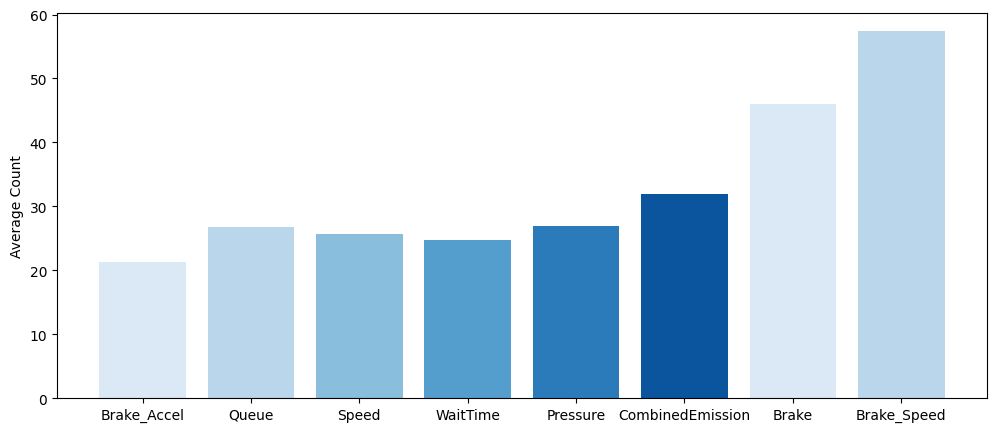

In [86]:
# Sample data
df_list = [(df_speed, 'Speed'),(df_waitTime, 'WaitTime'), (df_pressure, 'Pressure'), 
       (df_combinedEmission, 'CombinedEmission'), (df_brake, 'Brake'), (df_brake_speed, 'Brake_Speed')]

# already append brake_accel and queue to mean since the data had to be collected differently
means = [21.30, 26.75]
categories = ['Brake_Accel', 'Queue']

colors = sns.color_palette("Blues")

for (df, name) in df_list:
       means.append(df['system_local_#vehicles'].mean())
       categories.append(name)

plt.figure(figsize=(12, 5))

# Create bar chart
plt.bar(categories, means, align='center', alpha=1, capsize=10, color=colors)

plt.ylabel('Average Count')

plt.show()


##### Get average speed and waiting time

In [173]:
dfs = [(df_speed, 'Speed'), (df_brake, 'Brake'), (df_queue, 'Queue'), (df_waitTime, 'WaitTime'), 
       (df_brake_accel, 'Brake_Accel'), (df_pressure, 'Pressure'), 
       (df_combinedEmission, 'CombinedEmission'), (df_brake_speed, 'Brake_Speed')]

for df, name in dfs:
    print(name)
    df = df.groupby('episode').mean()
    print(df['agents_total_accumulated_waiting_time'].describe())



Speed
count       76.000000
mean      7321.200795
std       2567.773412
min        425.617347
25%       5684.275874
50%       7015.375083
75%       8576.111129
max      14361.548753
Name: agents_total_accumulated_waiting_time, dtype: float64
Brake
count       76.000000
mean     24218.095807
std       5389.677991
min       3633.262799
25%      24056.955480
50%      24741.555056
75%      26029.326630
max      33295.432920
Name: agents_total_accumulated_waiting_time, dtype: float64
Queue
count       76.000000
mean      6656.820335
std       2072.379078
min        468.431373
25%       5373.956974
50%       6381.843235
75%       8008.853206
max      13519.338583
Name: agents_total_accumulated_waiting_time, dtype: float64
WaitTime
count       76.000000
mean      6719.085418
std       1932.698689
min        474.341837
25%       5415.342198
50%       6413.549198
75%       7772.315844
max      14038.687500
Name: agents_total_accumulated_waiting_time, dtype: float64
Brake_Accel
count       76.00

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_54029/980714817.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('episode').mean()
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_54029/980714817.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('episode').mean()
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_54029/980714817.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should b

In [178]:
# get average local vehicles stopped

dfs = [(df_speed, 'Speed'), (df_brake, 'Brake'), (df_queue, 'Queue'), (df_waitTime, 'WaitTime'), 
       (df_brake_accel, 'Brake_Accel'), (df_pressure, 'Pressure'), 
       (df_combinedEmission, 'CombinedEmission'), (df_brake_speed, 'Brake_Speed')]


for (df,name) in dfs:
    print(name)
    df = df.groupby('episode').mean()
    print(df['agents_total_stopped'].describe())

Speed
count    76.000000
mean     19.103414
std       4.726124
min       5.653061
25%      15.994331
50%      17.845057
75%      21.508777
max      31.647727
Name: agents_total_stopped, dtype: float64
Brake
count    76.000000
mean     42.697146
std       6.596186
min      21.720904
25%      41.059831
50%      41.775281
75%      45.013631
max      60.882022
Name: agents_total_stopped, dtype: float64
Queue


/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_54029/3945597094.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('episode').mean()
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_54029/3945597094.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('episode').mean()
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_54029/3945597094.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which sh

count    76.000000
mean     18.738840
std       3.782444
min       6.578431
25%      16.412823
50%      18.383015
75%      20.933352
max      27.766892
Name: agents_total_stopped, dtype: float64
WaitTime
count    76.000000
mean     18.124631
std       3.258466
min       6.795918
25%      16.141873
50%      17.570659
75%      19.353632
max      31.476136
Name: agents_total_stopped, dtype: float64
Brake_Accel
count    76.000000
mean     55.483522
std       6.732411
min      25.477477
25%      52.563063
50%      57.583802
75%      59.720754
max      64.753656
Name: agents_total_stopped, dtype: float64
Pressure
count    76.000000
mean     20.200307
std       4.111393
min       6.800000
25%      17.404412
50%      19.679554
75%      22.439992
max      31.161798
Name: agents_total_stopped, dtype: float64
CombinedEmission


/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_54029/3945597094.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('episode').mean()
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_54029/3945597094.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('episode').mean()
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_54029/3945597094.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which sh

count    76.000000
mean     24.919629
std       4.975243
min       9.627451
25%      22.410473
50%      24.241598
75%      26.452719
max      55.477477
Name: agents_total_stopped, dtype: float64
Brake_Speed
count    76.000000
mean     52.999986
std       8.828706
min      26.946602
25%      50.598881
50%      53.220199
75%      57.207953
max      77.829932
Name: agents_total_stopped, dtype: float64


/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_54029/3945597094.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('episode').mean()


In [187]:
# get the index where stopping is highest

df_queue[df_queue['agents_total_stopped'] >= 77]

step  system_total_stopped  system_total_waiting_time  \
40618  28985.0                   717                     8902.0   
40619  28990.0                   727                     9297.0   
40620  28995.0                   741                     9703.0   
40621  29000.0                   730                    10113.0   
40622  29005.0                   704                    10523.0   
...        ...                   ...                        ...   
40752  29655.0                   877                    23750.0   
40753  29660.0                   872                    24142.0   
40754  29665.0                   883                    24530.0   
40759  29690.0                   969                    25855.0   
40761  29700.0                   950                    26565.0   

       system_mean_waiting_time  system_mean_speed  system_total_CO2  \
40618                207.023256           3.045052      5.256745e+06   
40619                216.209302           3.320093      5.281732e+06   
40620                225.651163           3.264043      4.878265e+06   
40621                235.186047           3.253211      4.763893e+06   
40622                244.720930           3.551703      5.103738e+06   
...                         ...                ...               ...   
40752                552.325581           2.824263      5.290247e+06   
40753                561.441860           2.821774      5.400123e+06   
40754                570.465116           2.954581      5.336576e+06   
40759                601.279070           2.495000      5.333752e+06   
40761                617.790698           2.529603      5.329413e+06   

       system_total_PMx  system_total_NOx  system_total_noise_emission  \
40618        712.495368      29173.108630                 68999.195422   
40619        712.345125      29636.497638                 68967.554106   
40620        673.629395      27308.513014                 68786.251363   
40621        639.476666      25647.195787                 68822.726169   
40622        687.731132      28117.850466                 69381.191475   
...                 ...               ...                          ...   
40752        753.412119      30469.269243                 74162.270071   
40753        764.160623      31055.334553                 74096.939712   
40754        745.263968      30102.093422                 74499.425464   
40759        762.499255      30710.527148                 74049.402255   
40761        761.394443      30590.068898                 73835.251800   

       system_local_CO2  system_local_CO  system_local_HC  system_local_PMx  \
40618     323592.031333      9268.389744        48.520667         53.172481   
40619     299763.094405      9516.779244        49.963902         49.948232   
40620     298485.048462      9566.062382        50.148513         49.979798   
40621     298485.504166      9566.133605        50.148851         49.979830   
40622     298485.482625      9566.130225        50.148835         49.979828   
...                 ...              ...              ...               ...   
40752     324880.572769     10728.466442        55.616459         52.785806   
40753     321551.463193     10568.369387        54.806708         52.712391   
40754     325944.686927     10553.451348        54.692686         53.252917   
40759     283879.915729      9609.768481        50.080874         45.801599   
40761     285706.339452      9414.955223        48.996673         47.908393   

       system_local_NOx  system_local_noise_emission  system_local_#vehicles  \
40618       2044.420878                   813.932925                   968.0   
40619       1822.665306                   809.356005                   969.0   
40620       1825.079930                   806.751929                   971.0   
40621       1825.080243                   806.756243                   971.0   
40622       1825.080228                   806.756700                   971.0   
...                 ..

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_54029/523578847.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('episode').mean()
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_54029/523578847.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('episode').mean()
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_54029/523578847.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which shoul

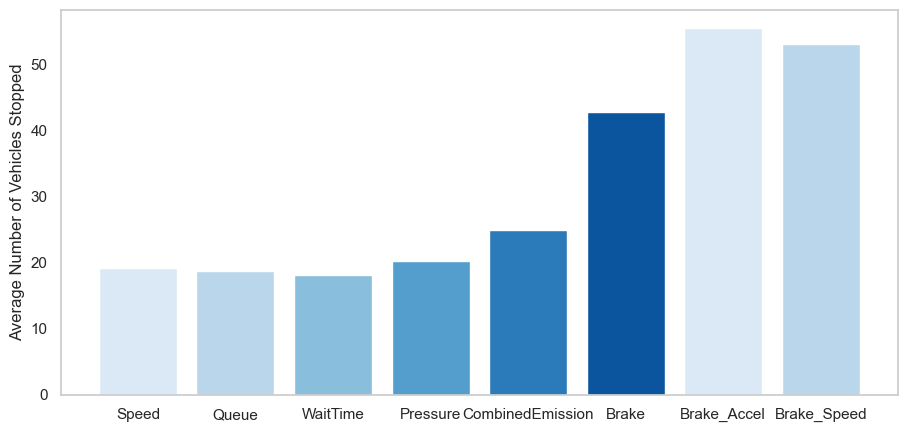

In [184]:
# plot stopped vehicles across reward types

dfs = [(df_speed, 'Speed'), (df_queue, 'Queue'), (df_waitTime, 'WaitTime'), 
        (df_pressure, 'Pressure'), (df_combinedEmission, 'CombinedEmission'), (df_brake, 'Brake'),
        (df_brake_accel, 'Brake_Accel'), (df_brake_speed, 'Brake_Speed')]

colors = sns.color_palette("Blues")

means = []
categories = []

for (df, name) in dfs:
        df = df.groupby('episode').mean()
        means.append(df['agents_total_stopped'].mean())
        categories.append(name)

plt.figure(figsize=(10.8, 5))

plt.grid(False)

# Create bar chart
plt.bar(categories, means, align='center', alpha=1,color=colors)

plt.ylabel('Average Number of Vehicles Stopped')

plt.show()


/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_54029/2165682080.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('episode').mean()
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_54029/2165682080.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('episode').mean()
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_54029/2165682080.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which sh

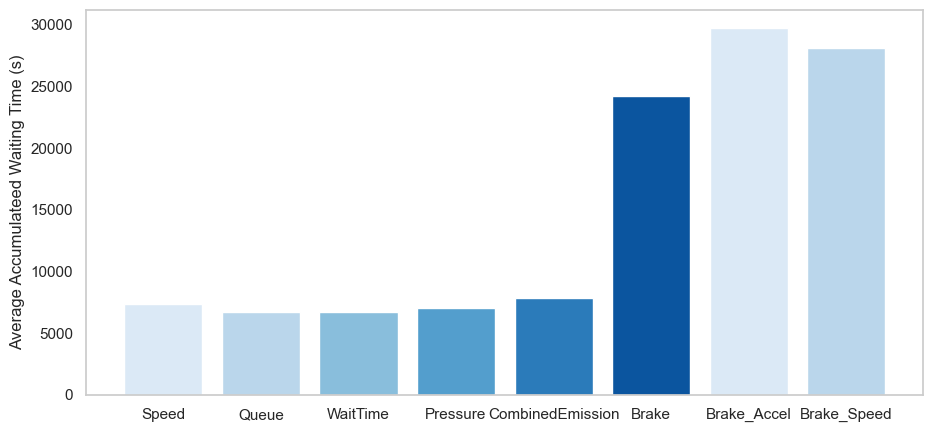

In [183]:
# plot waiting time across reward types

dfs = [(df_speed, 'Speed'), (df_queue, 'Queue'), (df_waitTime, 'WaitTime'), 
        (df_pressure, 'Pressure'), (df_combinedEmission, 'CombinedEmission'), (df_brake, 'Brake'),
        (df_brake_accel, 'Brake_Accel'), (df_brake_speed, 'Brake_Speed')]

colors = sns.color_palette("Blues")

means = []
categories = []

for (df, name) in dfs:
        df = df.groupby('episode').mean()
        means.append(df['agents_total_accumulated_waiting_time'].mean())
        categories.append(name)

plt.figure(figsize=(10.8, 5))

plt.grid(False)

# Create bar chart
plt.bar(categories, means, align='center', alpha=1,color=colors)

plt.ylabel('Average Accumulateed Waiting Time (s)')

plt.show()


/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_54029/3733961395.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('episode').mean().reset_index()
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_54029/3733961395.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('episode').mean().reset_index()
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_54029/3733961395.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or 

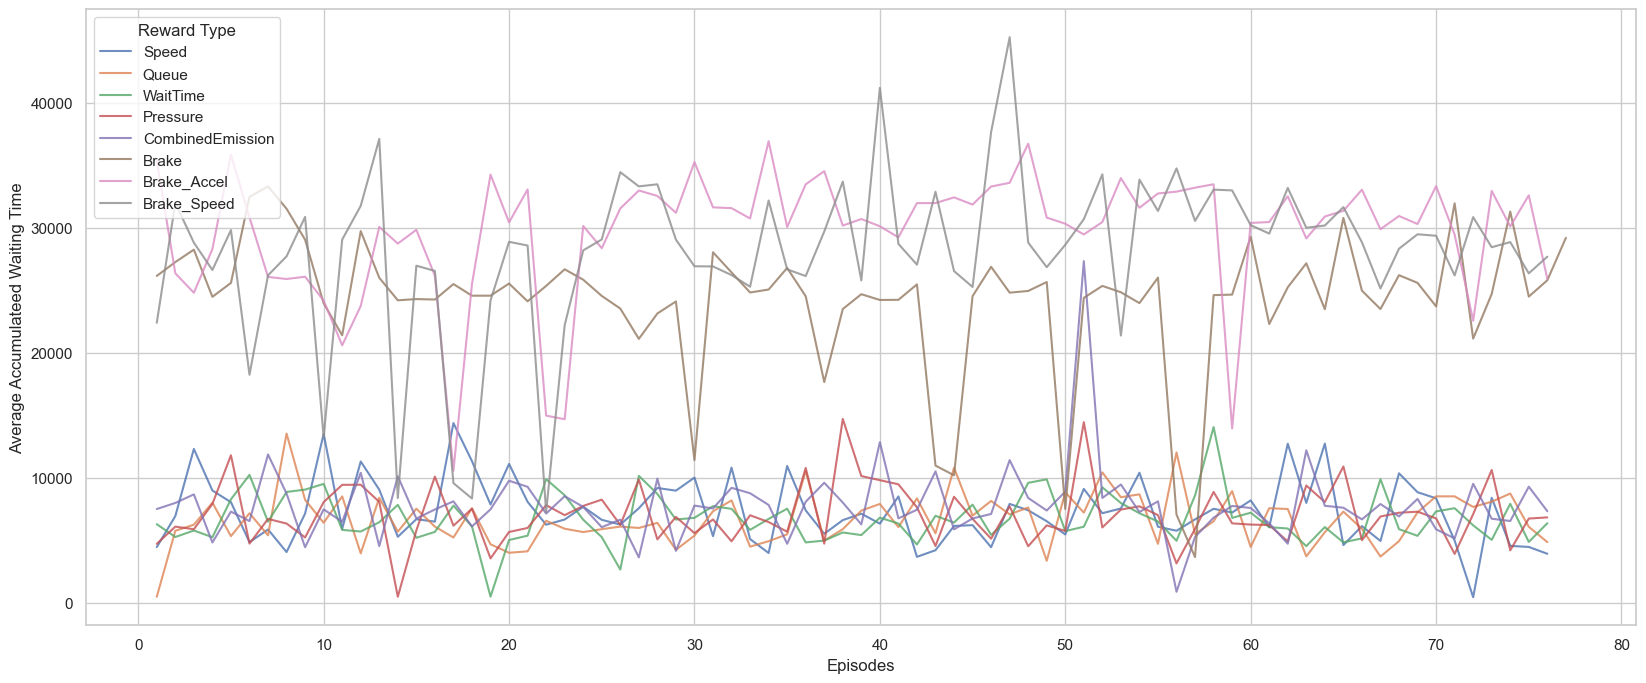

In [141]:
dfs = [(df_speed, 'Speed'), (df_queue, 'Queue'), (df_waitTime, 'WaitTime'), 
        (df_pressure, 'Pressure'), (df_combinedEmission, 'CombinedEmission'), (df_brake, 'Brake'),
        (df_brake_accel, 'Brake_Accel'), (df_brake_speed, 'Brake_Speed')]


categories = []

plt.figure(figsize = (20, 8))

for (df, name) in dfs:
        df = df.groupby('episode').mean().reset_index()
        plt.plot(df['episode'], df['agents_total_accumulated_waiting_time'], label=name, alpha=0.8)

plt.ylabel('Average Accumulateed Waiting Time')      
plt.xlabel('Episodes')

plt.legend(title='Reward Type', fancybox=True, loc='upper left')
plt.show()

In [ ]:
# get average local speed

df_list = [(df_speed, 'Speed'), (df_brake, 'Brake'), (df_waitTime, 'WaitTime'), (df_pressure, 'Pressure'), 
       (df_combinedEmission, 'CombinedEmission'), (df_brake_speed, 'Brake_Speed')]

for (df,name) in df_list:
    
    print(name)
    print(df['system_local_#vehicles'].describe())

In [ ]:
# get vehicle representation of different vehicle types

import pandas as pd
import ast

# Create a DataFrame
df = pd.DataFrame({
    'A': ["['truck3602']", "['bike1234', 'moto5678']", "['bus9012', 'veh3456', 'bike7890']"],
    'B': ['x', 'y', 'z']
})

# Convert string to list
df['A'] = df['A'].apply(ast.literal_eval)

# Extract vehicle representation
vehicle_representations = ['truck', 'bike', 'veh', 'moto', 'bus']
pattern = '|'.join(vehicle_representations)
df['vehicle_representation'] = df['A'].apply(lambda x: [re.match(pattern, i).group() for i in x if re.match(pattern, i)])

print(df)


# Flatten the list and convert to a Series
vehicle_series = pd.Series([item for sublist in df['vehicle_representation'].tolist() for item in sublist])

# Get the counts of each representation
counts = vehicle_series.value_counts()
print(counts)


#### Average Emission Statistics across all Episodes per Reward Type

In [7]:
print('Speed')
print(df_speed[['system_local_CO2', 'system_local_CO', 'system_local_HC','system_local_PMx','system_local_NOx','system_local_noise_emission']].mean())

print('Waiting Time')
print(df_waitTime[['system_local_CO2', 'system_local_CO', 'system_local_HC','system_local_PMx','system_local_NOx','system_local_noise_emission']].mean())

print('Queue')
print(df_queue[['system_local_CO2', 'system_local_CO', 'system_local_HC','system_local_PMx','system_local_NOx','system_local_noise_emission']].mean())

Speed
system_local_CO2               94488.430462
system_local_CO                 2740.670479
system_local_HC                   14.370932
system_local_PMx                  13.970086
system_local_NOx                 534.830016
system_local_noise_emission      360.006657
dtype: float64
Waiting Time
system_local_CO2               92792.792200
system_local_CO                 2598.377294
system_local_HC                   13.609493
system_local_PMx                  13.934162
system_local_NOx                 536.264122
system_local_noise_emission      367.880482
dtype: float64
Queue
system_local_CO2               93500.662415
system_local_CO                 2632.324670
system_local_HC                   14.124703
system_local_PMx                  14.137096
system_local_NOx                 541.615058
system_local_noise_emission      364.199458
dtype: float64


In [82]:
print('Brake')
print(df_brake[['system_local_CO2', 'system_local_CO', 'system_local_HC','system_local_PMx','system_local_NOx','system_local_noise_emission']].mean())

print('Brake Accel')
print(df_brake_accel[['system_local_CO2', 'system_local_CO', 'system_local_HC','system_local_PMx','system_local_NOx','system_local_noise_emission']].mean())

print('Brake Speed')
print(df_brake_speed[['system_local_CO2', 'system_local_CO', 'system_local_HC','system_local_PMx','system_local_NOx','system_local_noise_emission']].mean())

Brake
system_local_CO2               149184.259380
system_local_CO                  4562.374238
system_local_HC                    25.601813
system_local_PMx                   24.379184
system_local_NOx                  898.853933
system_local_noise_emission       557.556524
dtype: float64
Brake Accel
system_local_CO2               199702.762054
system_local_CO                  6571.565452
system_local_HC                    40.850529
system_local_PMx                   32.231692
system_local_NOx                 1160.773591
system_local_noise_emission       750.643839
dtype: float64
Brake Speed
system_local_CO2               191392.989655
system_local_CO                  6027.016241
system_local_HC                    39.731529
system_local_PMx                   31.210598
system_local_NOx                 1129.380370
system_local_noise_emission       747.359889
dtype: float64


In [83]:
print('Pressure')
print(df_pressure[['system_local_CO2', 'system_local_CO', 'system_local_HC','system_local_PMx','system_local_NOx','system_local_noise_emission']].mean())

print('Combined Emission')
print(df_combinedEmission[['system_local_CO2', 'system_local_CO', 'system_local_HC','system_local_PMx','system_local_NOx','system_local_noise_emission']].mean())


Pressure
system_local_CO2               98780.743974
system_local_CO                 2875.349513
system_local_HC                   15.098247
system_local_PMx                  14.684725
system_local_NOx                 561.022971
system_local_noise_emission      391.369333
dtype: float64
Combined Emission
system_local_CO2               117023.607379
system_local_CO                  3528.057248
system_local_HC                    18.604097
system_local_PMx                   17.567401
system_local_NOx                  664.017625
system_local_noise_emission       478.028154
dtype: float64


#### Plot Emission Comparison for Reward Type

##### CO2 Comparison

###### Average Emission

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_33596/1129556077.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  local_CO2['speed'] = df_speed.groupby('episode').mean()['system_local_CO2']
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_33596/1129556077.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  local_CO2['brake'] = df_brake.groupby('episode').mean()['system_local_CO2']
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_33596/1129556077.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only w

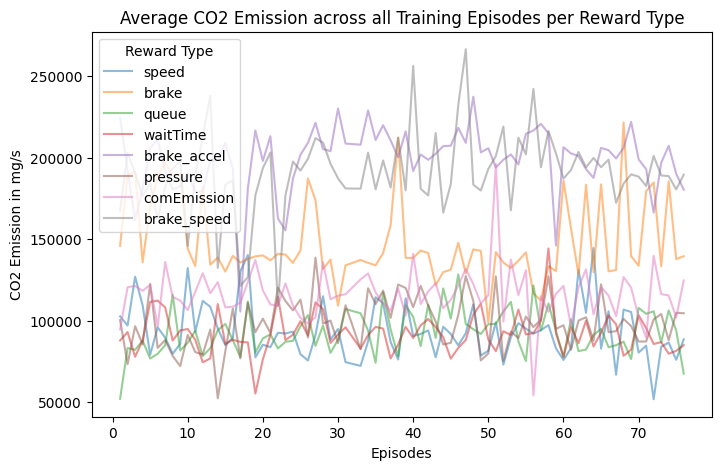

In [15]:
# new dataframe with local emissions for each reward type 

local_CO2 = pd.DataFrame()

local_CO2['speed'] = df_speed.groupby('episode').mean()['system_local_CO2']
local_CO2['brake'] = df_brake.groupby('episode').mean()['system_local_CO2']
local_CO2['queue'] = df_queue.groupby('episode').mean()['system_local_CO2']
local_CO2['waitTime'] = df_waitTime.groupby('episode').mean()['system_local_CO2']
local_CO2['brake_accel'] = df_brake_accel.groupby('episode').mean()['system_local_CO2']
local_CO2['pressure'] = df_pressure.groupby('episode').mean()['system_local_CO2']
local_CO2['comEmission'] = df_combinedEmission.groupby('episode').mean()['system_local_CO2']
local_CO2['brake_speed'] = df_brake_speed.groupby('episode').mean()['system_local_CO2']

local_CO2.dropna(inplace=True) # drop episodes that are empty for some reward types

# get average CO2 emission across all episodes plot local CO2 emission for entire training process for each reward type in one figure

plt.figure(figsize=(8,5))

for column in local_CO2.columns:
       plt.plot(local_CO2.index, local_CO2[column], label=column, alpha=0.5) # divide by 1000 to get g
       
plt.xlabel('Episodes')
plt.ylabel('CO2 Emission in mg/s')  
plt.legend(title='Reward Type', fancybox=True, loc='upper left')
plt.title('Average CO2 Emission across all Training Episodes per Reward Type')
plt.show()

In [15]:
# get minimum of each reward types' average 
local_CO2.dropna().min().sort_values()

speed           51908.267516
queue           52197.732132
pressure        52498.888211
comEmission     54277.738815
waitTime        55404.529234
brake           98940.853004
brake_accel    105685.874323
brake_speed    109201.858419
dtype: float64

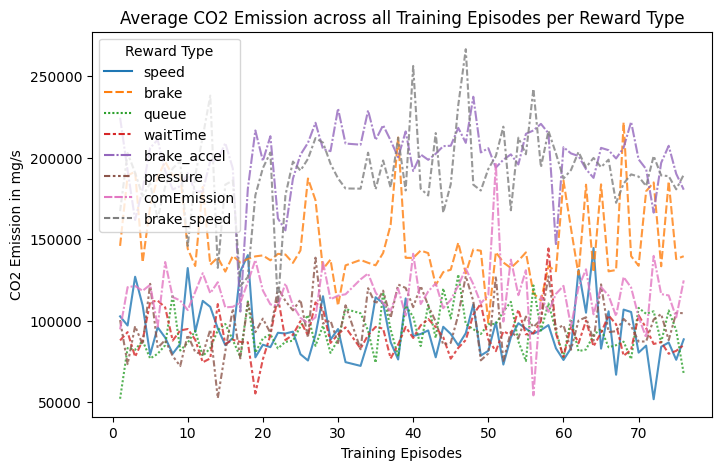

In [14]:
# plot with seaborn
plt.figure(figsize=(8,5))
ax = sns.lineplot(data=local_CO2, alpha=0.8)
ax.set_xlabel('Training Episodes')
ax.set_ylabel('CO2 Emission in mg/s')
ax.set_title('Average CO2 Emission across all Training Episodes per Reward Type')
ax.legend(title='Reward Type', loc='upper left', fancybox=True)

##### CO Comparison

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_2297/3470227151.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  local_CO['speed'] = df_speed.groupby('episode').mean()['system_local_CO']
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_2297/3470227151.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  local_CO['brake'] = df_brake.groupby('episode').mean()['system_local_CO']
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_2297/3470227151.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will def

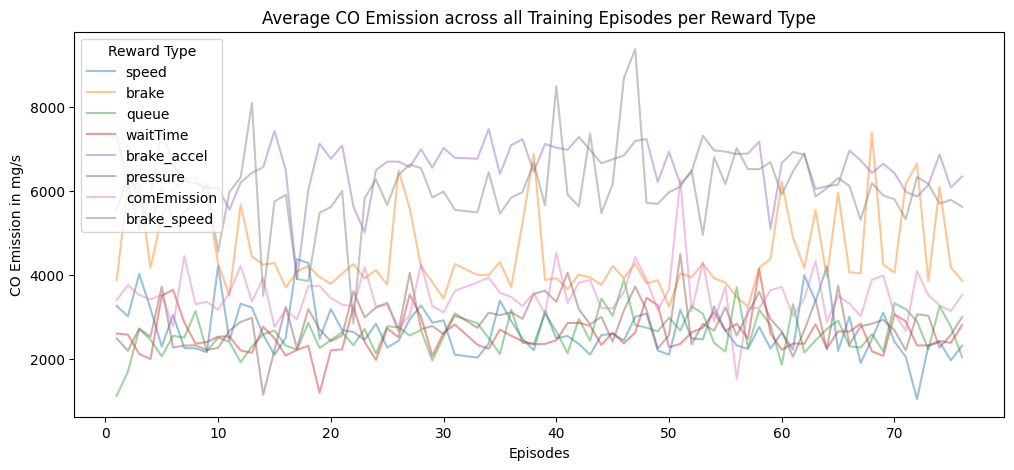

waitTime       2578.389574
queue          2607.006527
speed          2709.571612
pressure       2863.375866
comEmission    3506.703233
brake          4532.628119
brake_speed    5997.468531
brake_accel    6553.491953
dtype: float64


In [79]:
# new dataframe with local emissions for each reward type 

local_CO = pd.DataFrame()

local_CO['speed'] = df_speed.groupby('episode').mean()['system_local_CO']
local_CO['brake'] = df_brake.groupby('episode').mean()['system_local_CO']
local_CO['queue'] = df_queue.groupby('episode').mean()['system_local_CO']
local_CO['waitTime'] = df_waitTime.groupby('episode').mean()['system_local_CO']
local_CO['brake_accel'] = df_brake_accel.groupby('episode').mean()['system_local_CO']
local_CO['pressure'] = df_pressure.groupby('episode').mean()['system_local_CO']
local_CO['comEmission'] = df_combinedEmission.groupby('episode').mean()['system_local_CO']
local_CO['brake_speed'] = df_brake_speed.groupby('episode').mean()['system_local_CO']

local_CO.dropna(inplace=True) # drop episodes that are empty for some reward types

# get average CO emission across all episodes plot local CO emission for entire training process for each reward type in one figure

plt.figure(figsize=(12,5))

for column in local_CO.columns:
       plt.plot(local_CO.index, local_CO[column], label=column, alpha=0.45) 
       
plt.xlabel('Episodes')
plt.ylabel('CO Emission in mg/s')  
plt.legend(title='Reward Type', fancybox=True, loc='upper left')
plt.title('Average CO Emission across all Training Episodes per Reward Type')
plt.show()

# get mean of each reward types' average since the plots still overlap too much for clear identification

print(local_CO.mean().sort_values())

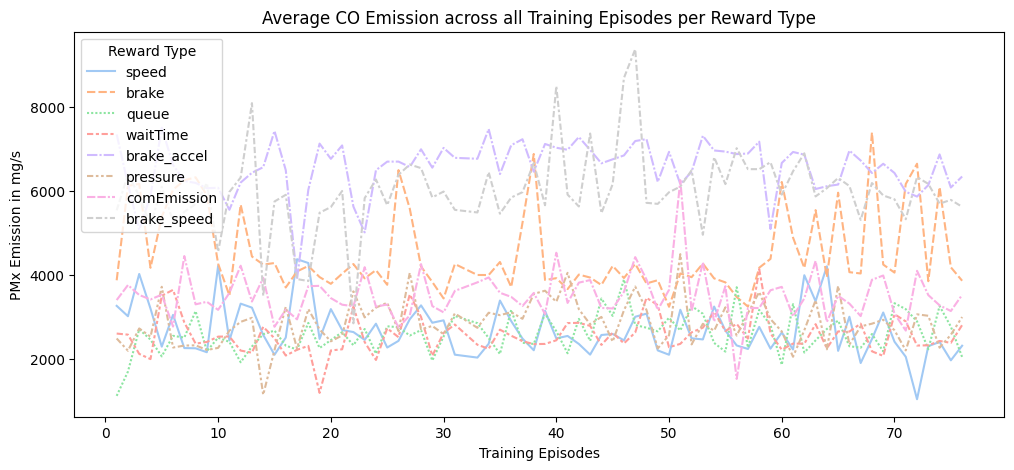

In [19]:
# plot with seaborn

plt.figure(figsize=(12,5))
ax = sns.lineplot(data=local_CO, palette='pastel')
ax.set_xlabel('Training Episodes')
ax.set_ylabel('PMx Emission in mg/s')
ax.set_title('Average CO Emission across all Training Episodes per Reward Type')
ax.legend(title='Reward Type', loc='upper left', fancybox=True)

##### PMx Comparison

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_29567/3942395726.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  local_PMx['speed'] = df_speed.groupby('episode').mean()['system_local_PMx']
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_29567/3942395726.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  local_PMx['brake'] = df_brake.groupby('episode').mean()['system_local_PMx']
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_29567/3942395726.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only w

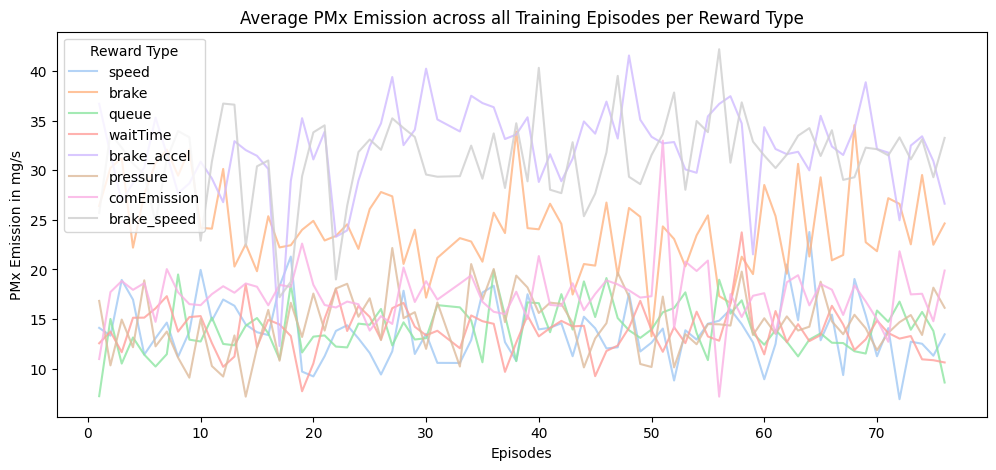

In [62]:
# new dataframe with local emissions for each reward type 

local_PMx = pd.DataFrame()

local_PMx['speed'] = df_speed.groupby('episode').mean()['system_local_PMx']
local_PMx['brake'] = df_brake.groupby('episode').mean()['system_local_PMx']
local_PMx['queue'] = df_queue.groupby('episode').mean()['system_local_PMx']
local_PMx['waitTime'] = df_waitTime.groupby('episode').mean()['system_local_PMx']
local_PMx['brake_accel'] = df_brake_accel.groupby('episode').mean()['system_local_PMx']
local_PMx['pressure'] = df_pressure.groupby('episode').mean()['system_local_PMx']
local_PMx['comEmission'] = df_combinedEmission.groupby('episode').mean()['system_local_PMx']
local_PMx['brake_speed'] = df_brake_speed.groupby('episode').mean()['system_local_PMx']

local_PMx.dropna(inplace=True) # drop empty episodes after 76

# get average CO2 emission across all episodes plot local CO2 emission for entire training process for each reward type in one figure
plt.figure(figsize=(12,5))

for column in local_PMx.columns:
       plt.plot(local_PMx.index, local_PMx[column], label=column, alpha=0.8)
       
plt.xlabel('Episodes')
plt.ylabel('PMx Emission in mg/s')  
plt.legend(title='Reward Type', fancybox=True, loc='upper left')
plt.title('Average PMx Emission across all Training Episodes per Reward Type')
plt.show()

In [21]:
# get mean of each reward types' average since the plots still overlap too much for clear identification

local_PMx.mean().sort_values()

waitTime       13.839974
speed          13.877447
queue          14.026544
pressure       14.637440
comEmission    17.441709
brake          24.239544
brake_speed    31.124407
brake_accel    32.110573
dtype: float64

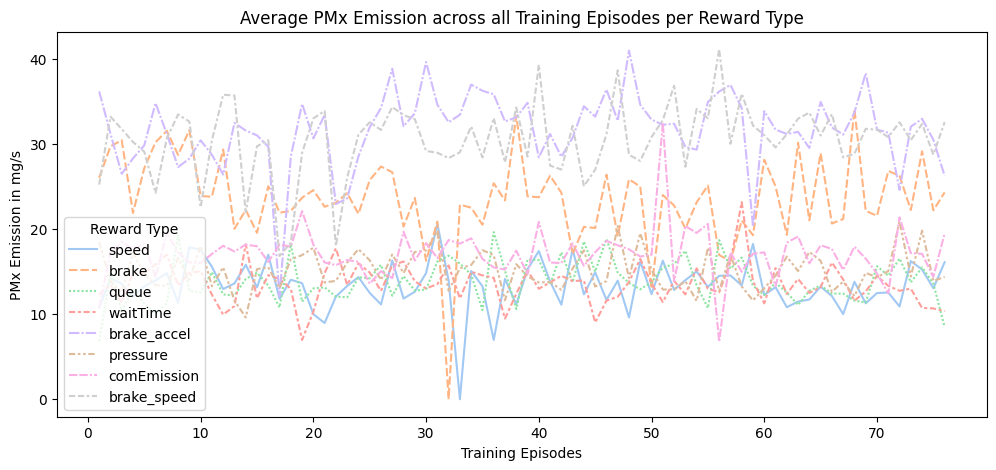

In [34]:
# plot with seaborn

plt.figure(figsize=(12,5))
ax = sns.lineplot(data=local_PMx, palette='pastel')
ax.set_xlabel('Training Episodes')
ax.set_ylabel('PMx Emission in mg/s')
ax.set_title('Average PMx Emission across all Training Episodes per Reward Type')
ax.legend(title='Reward Type', loc='lower left', fancybox=True)

##### NOx Comparison

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_29567/3337849722.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  local_NOx['speed'] = df_speed.groupby('episode').mean()['system_local_NOx']
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_29567/3337849722.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  local_NOx['brake'] = df_brake.groupby('episode').mean()['system_local_NOx']
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_29567/3337849722.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only w

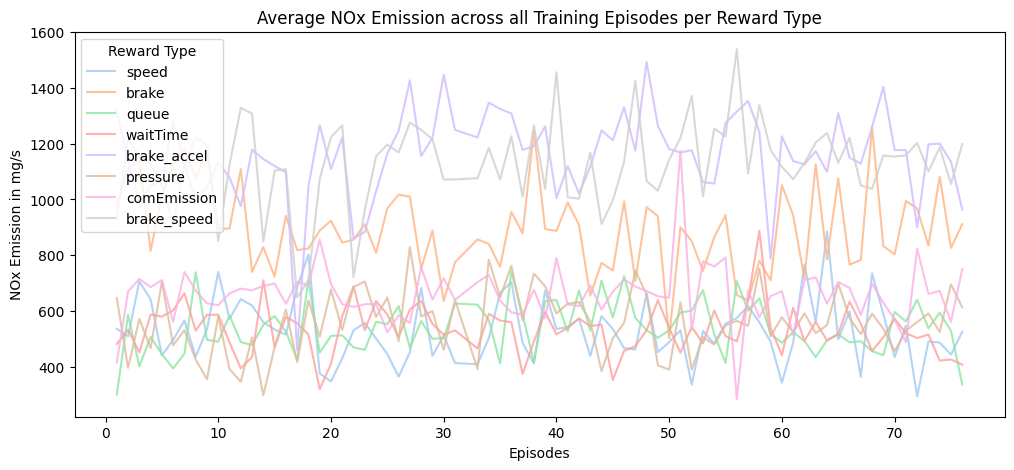

speed           531.750723
waitTime        532.944362
queue           537.696886
pressure        559.368429
comEmission     659.441512
brake           893.722701
brake_speed    1126.593442
brake_accel    1156.628491
dtype: float64


In [63]:
# new dataframe with local emissions for each reward type 

local_NOx = pd.DataFrame()

local_NOx['speed'] = df_speed.groupby('episode').mean()['system_local_NOx']
local_NOx['brake'] = df_brake.groupby('episode').mean()['system_local_NOx']
local_NOx['queue'] = df_queue.groupby('episode').mean()['system_local_NOx']
local_NOx['waitTime'] = df_waitTime.groupby('episode').mean()['system_local_NOx']
local_NOx['brake_accel'] = df_brake_accel.groupby('episode').mean()['system_local_NOx']
local_NOx['pressure'] = df_pressure.groupby('episode').mean()['system_local_NOx']
local_NOx['comEmission'] = df_combinedEmission.groupby('episode').mean()['system_local_NOx']
local_NOx['brake_speed'] = df_brake_speed.groupby('episode').mean()['system_local_NOx']

local_NOx.dropna(inplace=True) # drop empty episodes after 76

# get average CO2 emission across all episodes plot local CO2 emission for entire training process for each reward type in one figure
plt.figure(figsize=(12,5))

for column in local_NOx.columns:
       plt.plot(local_NOx.index, local_NOx[column], label=column, alpha=0.8)
       
plt.xlabel('Episodes')
plt.ylabel('NOx Emission in mg/s')  
plt.legend(title='Reward Type', fancybox=True ,loc='upper left')
plt.title('Average NOx Emission across all Training Episodes per Reward Type')
plt.show()


# get mean of each reward types' average since the plots still overlap too much for clear identification
print(local_NOx.mean().sort_values())

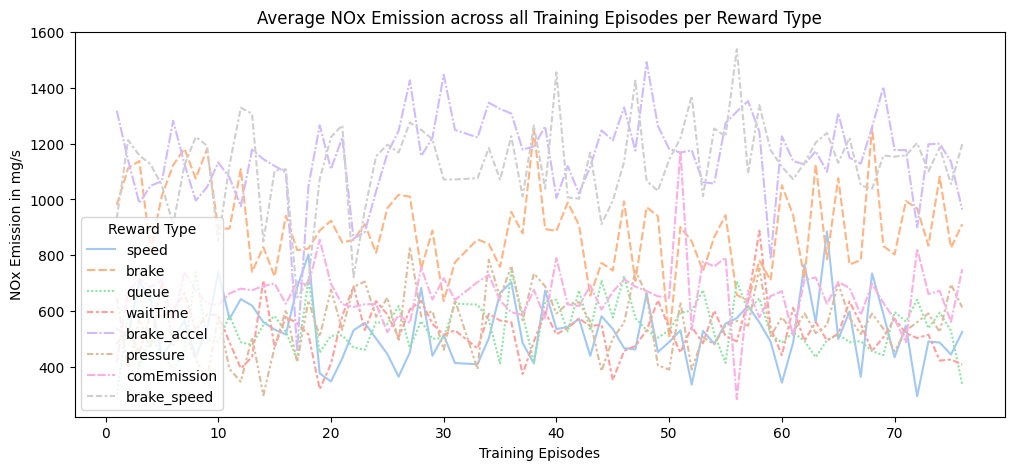

In [52]:
plt.figure(figsize=(12,5))
ax = sns.lineplot(data=local_NOx, palette='pastel')
ax.set_xlabel('Training Episodes')
ax.set_ylabel('NOx Emission in mg/s')
ax.set_title('Average NOx Emission across all Training Episodes per Reward Type')
ax.legend(title='Reward Type', loc='lower left', fancybox=True)

##### HC Comparison

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_29567/2231172147.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  local_HC['speed'] = df_speed.groupby('episode').mean()['system_local_HC']
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_29567/2231172147.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  local_HC['brake'] = df_brake.groupby('episode').mean()['system_local_HC']
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_29567/2231172147.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will 

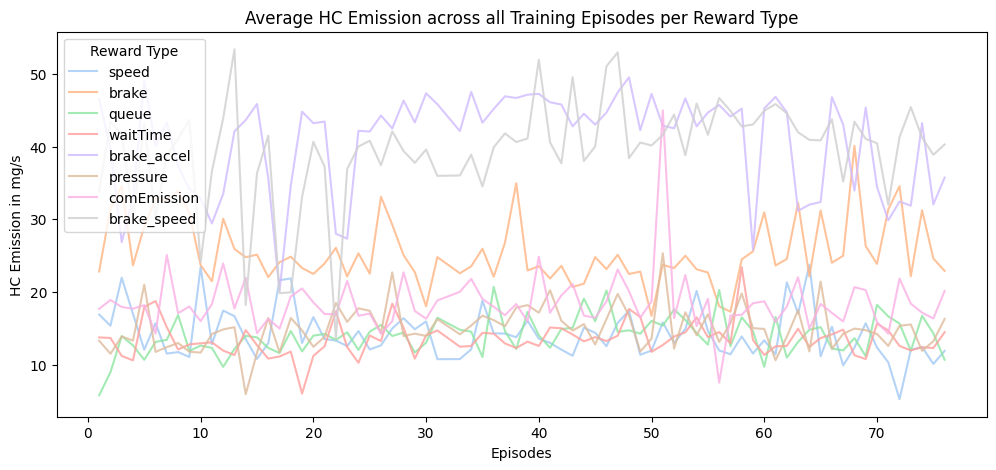

waitTime       13.499651
queue          13.979002
speed          14.210188
pressure       15.037467
comEmission    18.489402
brake          25.469207
brake_speed    39.461898
brake_accel    40.650226
dtype: float64


In [64]:
# new dataframe with local emissions for each reward type 

local_HC = pd.DataFrame()

local_HC['speed'] = df_speed.groupby('episode').mean()['system_local_HC']
local_HC['brake'] = df_brake.groupby('episode').mean()['system_local_HC']
local_HC['queue'] = df_queue.groupby('episode').mean()['system_local_HC']
local_HC['waitTime'] = df_waitTime.groupby('episode').mean()['system_local_HC']
local_HC['brake_accel'] = df_brake_accel.groupby('episode').mean()['system_local_HC']
local_HC['pressure'] = df_pressure.groupby('episode').mean()['system_local_HC']
local_HC['comEmission'] = df_combinedEmission.groupby('episode').mean()['system_local_HC']
local_HC['brake_speed'] = df_brake_speed.groupby('episode').mean()['system_local_HC']

local_HC.dropna(inplace=True) # drop episodes that are empty for some reward types

# get average HC emission across all episodes plot local HC emission for entire training process for each reward type in one figure

plt.figure(figsize=(12,5))

for column in local_HC.columns:
       plt.plot(local_HC.index, local_HC[column], label=column, alpha=0.8) 
       
plt.xlabel('Episodes')
plt.ylabel('HC Emission in mg/s')  
plt.legend(title='Reward Type', fancybox=True, loc='upper left')
plt.title('Average HC Emission across all Training Episodes per Reward Type')
plt.show()

# get mean of each reward types' average since the plots still overlap too much for clear identification

print(local_HC.mean().sort_values())

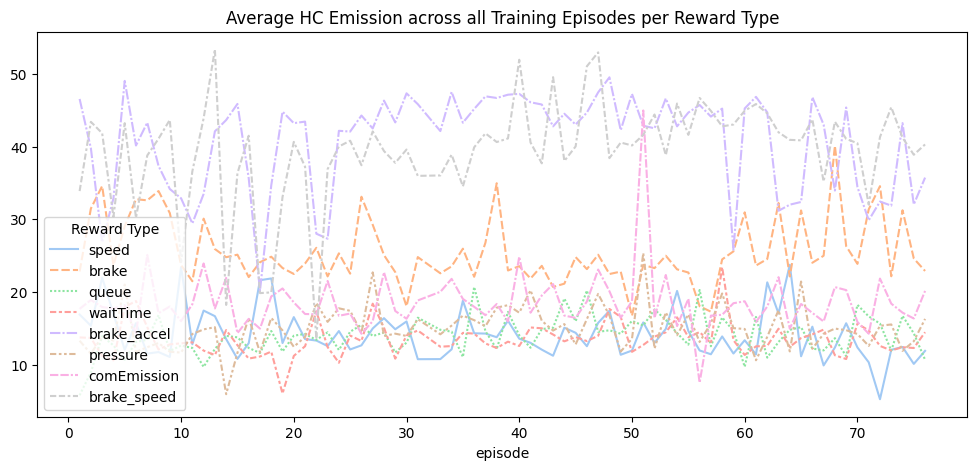

In [65]:
plt.figure(figsize=(12,5))
ax = sns.lineplot(data=local_HC, palette='pastel')

ax.set_title('Average HC Emission across all Training Episodes per Reward Type')
ax.legend(title='Reward Type', loc='lower left', fancybox=True)

### Emission and Reward Relationship

In [610]:
df_speed.groupby('episode').sum()

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_29567/1531118382.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_speed.groupby('episode').sum()


step  system_total_stopped  system_total_waiting_time  \
episode                                                                
1        24277855.0                   549                   886003.0   
2        24201825.0                   504                  2002302.0   
3        24227215.0                   520                  5005823.0   
4        24227215.0                   463                  3087306.0   
5        24201850.0                   514                  1449469.0   
...             ...                   ...                        ...   
607      24732450.0                   883                  1937790.0   
608      24732450.0                   856                  1632787.0   
609      24732450.0                   628                  1022425.0   
610      24732450.0                   693                  2557214.0   
611      24732450.0                   666                  4390987.0   

         system_mean_waiting_time  system_mean_speed  system_total_CO2  \
episode                                                                  
1                    20604.720930        1936.526639      3.729593e+09   
2                    46565.162791        2214.191986      3.749812e+09   
3                   116414.488372        2060.470987      3.693969e+09   
4                    71797.813953        2569.671592      3.718046e+09   
5                    33708.581395        2376.620403      3.852961e+09   
...                           ...                ...               ...   
607                  45064.883721        2740.749897      3.816491e+09   
608                  37971.790698        2207.724426      3.783745e+09   
609                  23777.325581        2590.924497      3.633691e+09   
610                  59470.093023        2152.757499      3.782419e+09   
611                 102115.976744        1909.101815      3.698558e+09   

         system_total_PMx  system_total_NOx  system_total_noise_emission  \
episode                                                                    
1           520710.439351      2.173034e+07                 4.933773e+07   
2           527754.668282      2.196939e+07                 4.969684e+07   
3           522364.611268      2.171655e+07                 4.891670e+07   
4           522116.308410      2.174290e+07                 4.923590e+07   
5           543409.319812      2.241240e+07                 5.183910e+07   
...                   ...               ...                          ...   
607         538477.334475      2.228824e+07                 5.100670e+07   
608         534981.412312      2.216871e+07                 5.034861e+07   
609         508014.404740      2.129589e+07                 4.763294e+07   
610         532264.946615      2.207358e+07                 5.037497e+07   
611         522617.982726      2.174822e+07                 4.891851e+07   

         system_local_CO2  system_local_CO  system_local_HC  system_local_PMx  \
episode                                                                         
1            9.073537e+07     2.886542e+06     14905.572831      12458.135749   
2            8.548825e+07     2.659527e+06     13499.559483      11726.127794   
3            1.119375e+08     3.549484e+06     19333.740025      16685.470477   
4            9.647678e+07     2.823357e+06     14949.674802      14937.080110   
5            6.970891e+07     2.021834e+06     10596.472049      10044.775602   
...                   ...              ...              ...               ...   
607          8.392141e+07     2.037891e+06     10490.019993      14249.295340   
608          7.623829e+07     1.950130e+06     10214.832532      12598.120380   
609          8.525704e+07     2.392092e+06     12367.448794      12377.642727   
610          8.825366e+07     2.437373e+06     12478.710845      13515.238383   
611          1.143824e+08     3.435856e+06     20418.218101      17601.309789   

         system_local_NOx  system_local_noise_emission  \
episode       

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_2297/2275769274.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby('episode').mean().reset_index()
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_2297/2275769274.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby('episode').mean().reset_index()
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_2297/2275769274.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify num

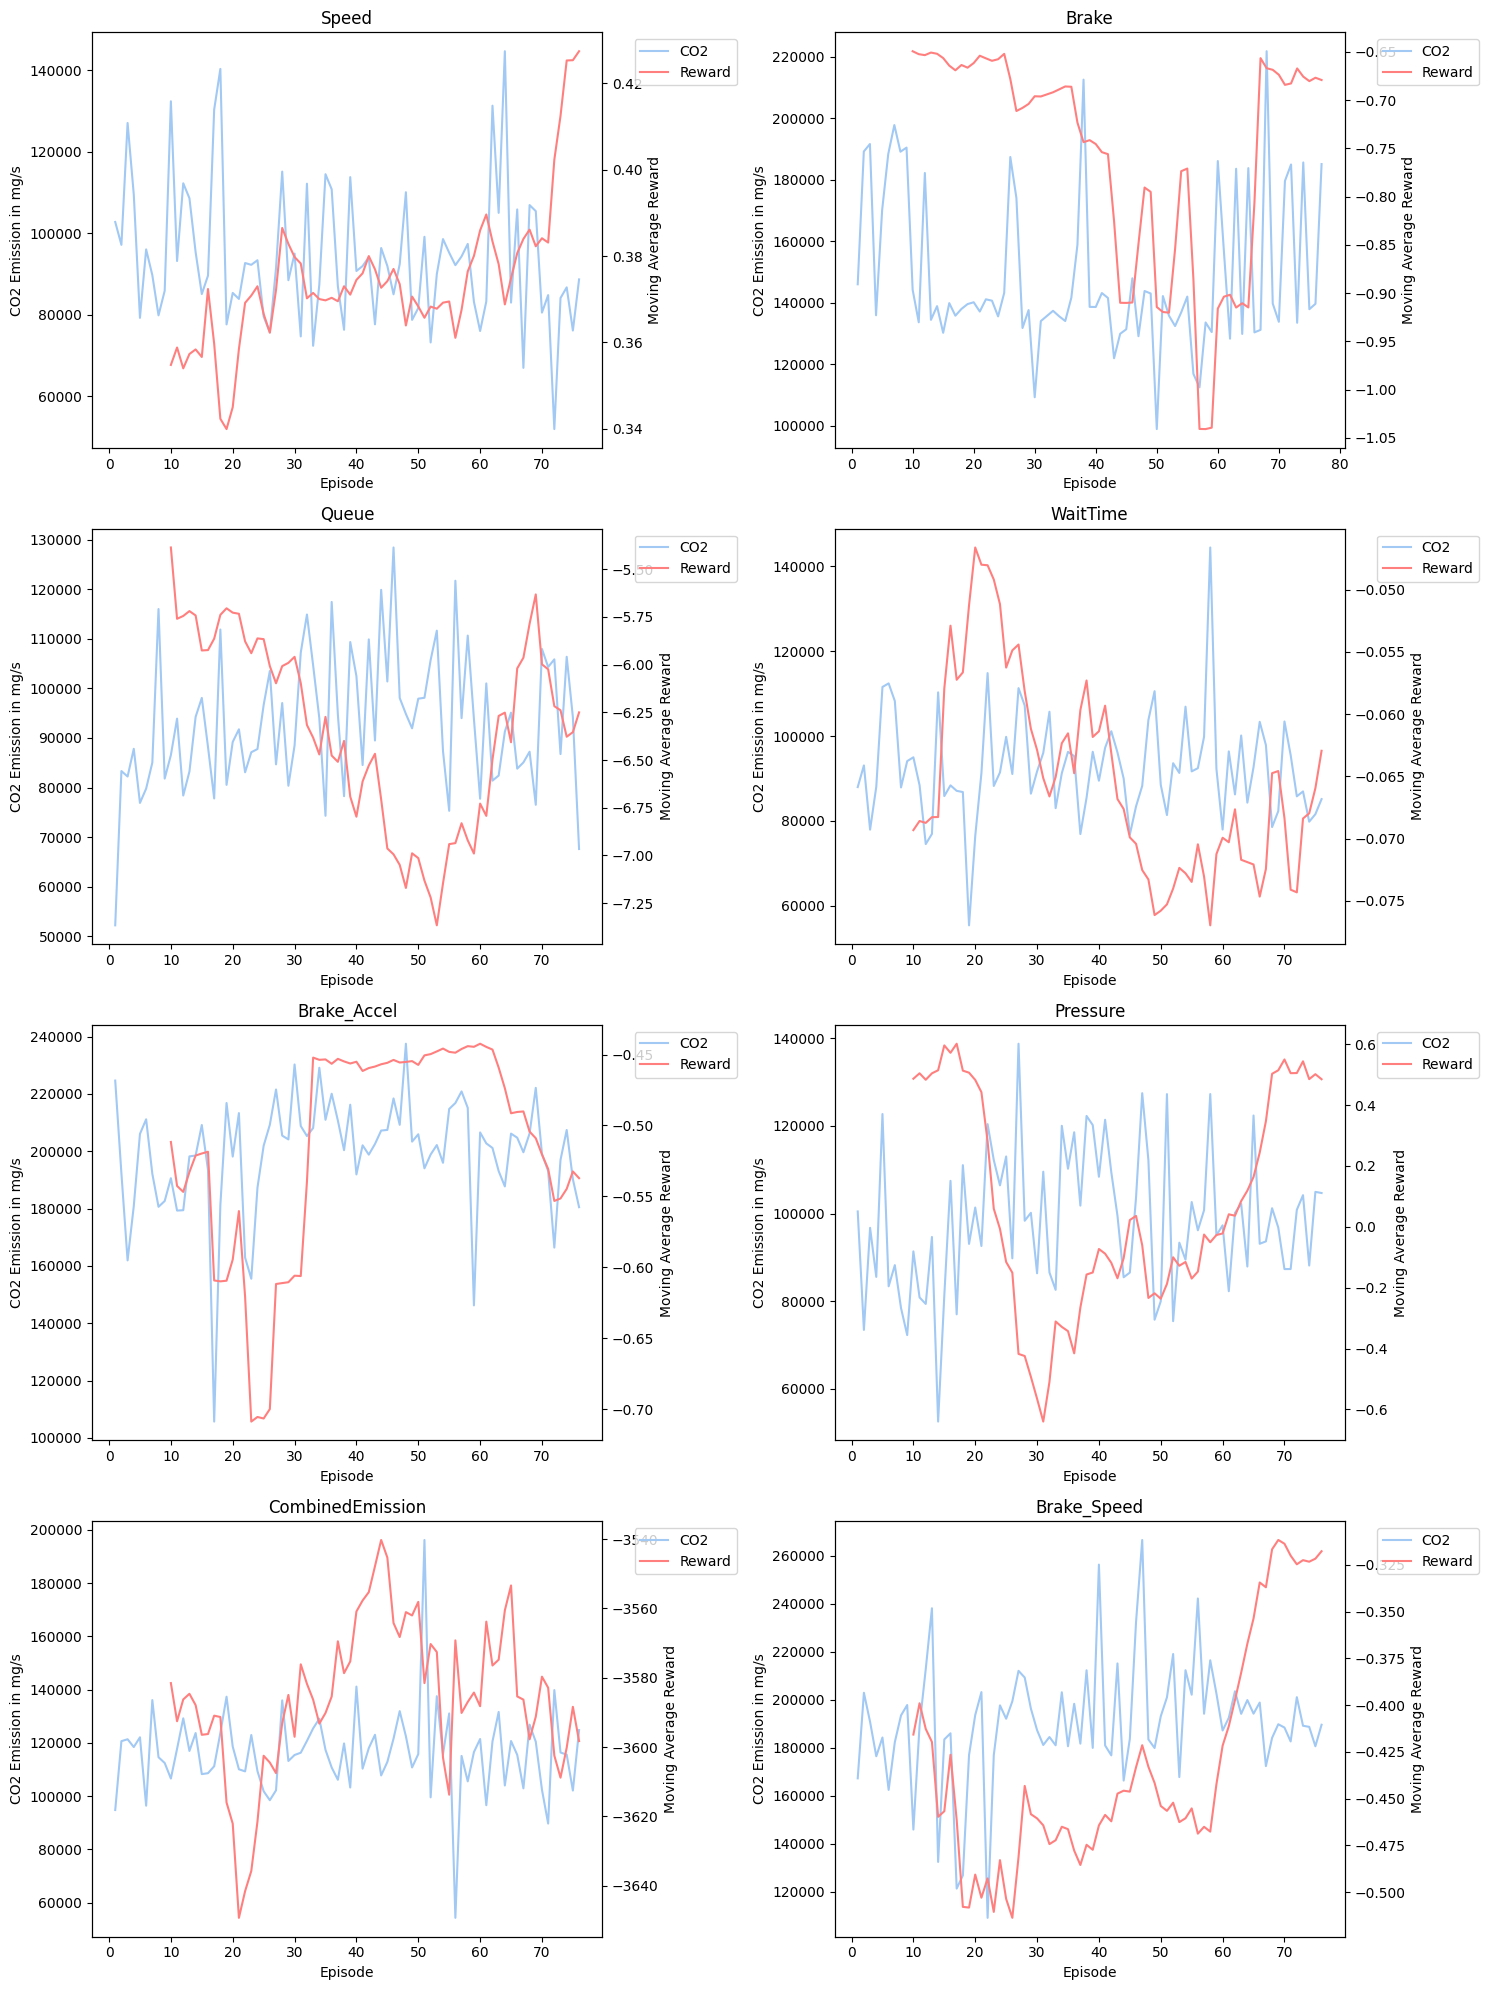

In [172]:
# List of dataframes and their names
dfs = [(df_speed, 'Speed'), (df_brake, 'Brake'), (df_queue, 'Queue'), (df_waitTime, 'WaitTime'), 
       (df_brake_accel, 'Brake_Accel'), (df_pressure, 'Pressure'), 
       (df_combinedEmission, 'CombinedEmission'), (df_brake_speed, 'Brake_Speed')]


fig, axs = plt.subplots(4, 2, figsize=(15, 20))

sns.set_palette("pastel")

# Iterate over the list of dataframes
for i, (df, name) in enumerate(dfs):
    # Group by episode and calculate the mean
    df_grouped = df.groupby('episode').mean().reset_index()
    
    df_grouped['system_last_reward'] = df_grouped['system_last_reward'].rolling(10).mean()

    # Create a subplot
    ax = axs[i//2, i%2]
    
    sns.lineplot(x='episode', y='system_local_CO2', data=df_grouped, ax=ax)
    ax2 = ax.twinx()
    sns.lineplot(x='episode', y='system_last_reward', data=df_grouped, ax=ax2, color='#ff7f7f')

    ax.set_xlabel('Episode')
    ax.set_ylabel('CO2 Emission in mg/s')
    ax2.set_ylabel('Moving Average Reward')
    ax.set_title(name)
    
    co2_line = mlines.Line2D([], [], color=sns.color_palette("pastel")[0], label='CO2')
    reward_line = mlines.Line2D([], [], color='#ff7f7f', label='Reward')
    ax2.legend(handles=[co2_line, reward_line], loc='upper left', bbox_to_anchor=(1.05, 1))

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_2297/2573332097.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby('episode').mean().reset_index()
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_2297/2573332097.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby('episode').mean().reset_index()
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_2297/2573332097.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify num

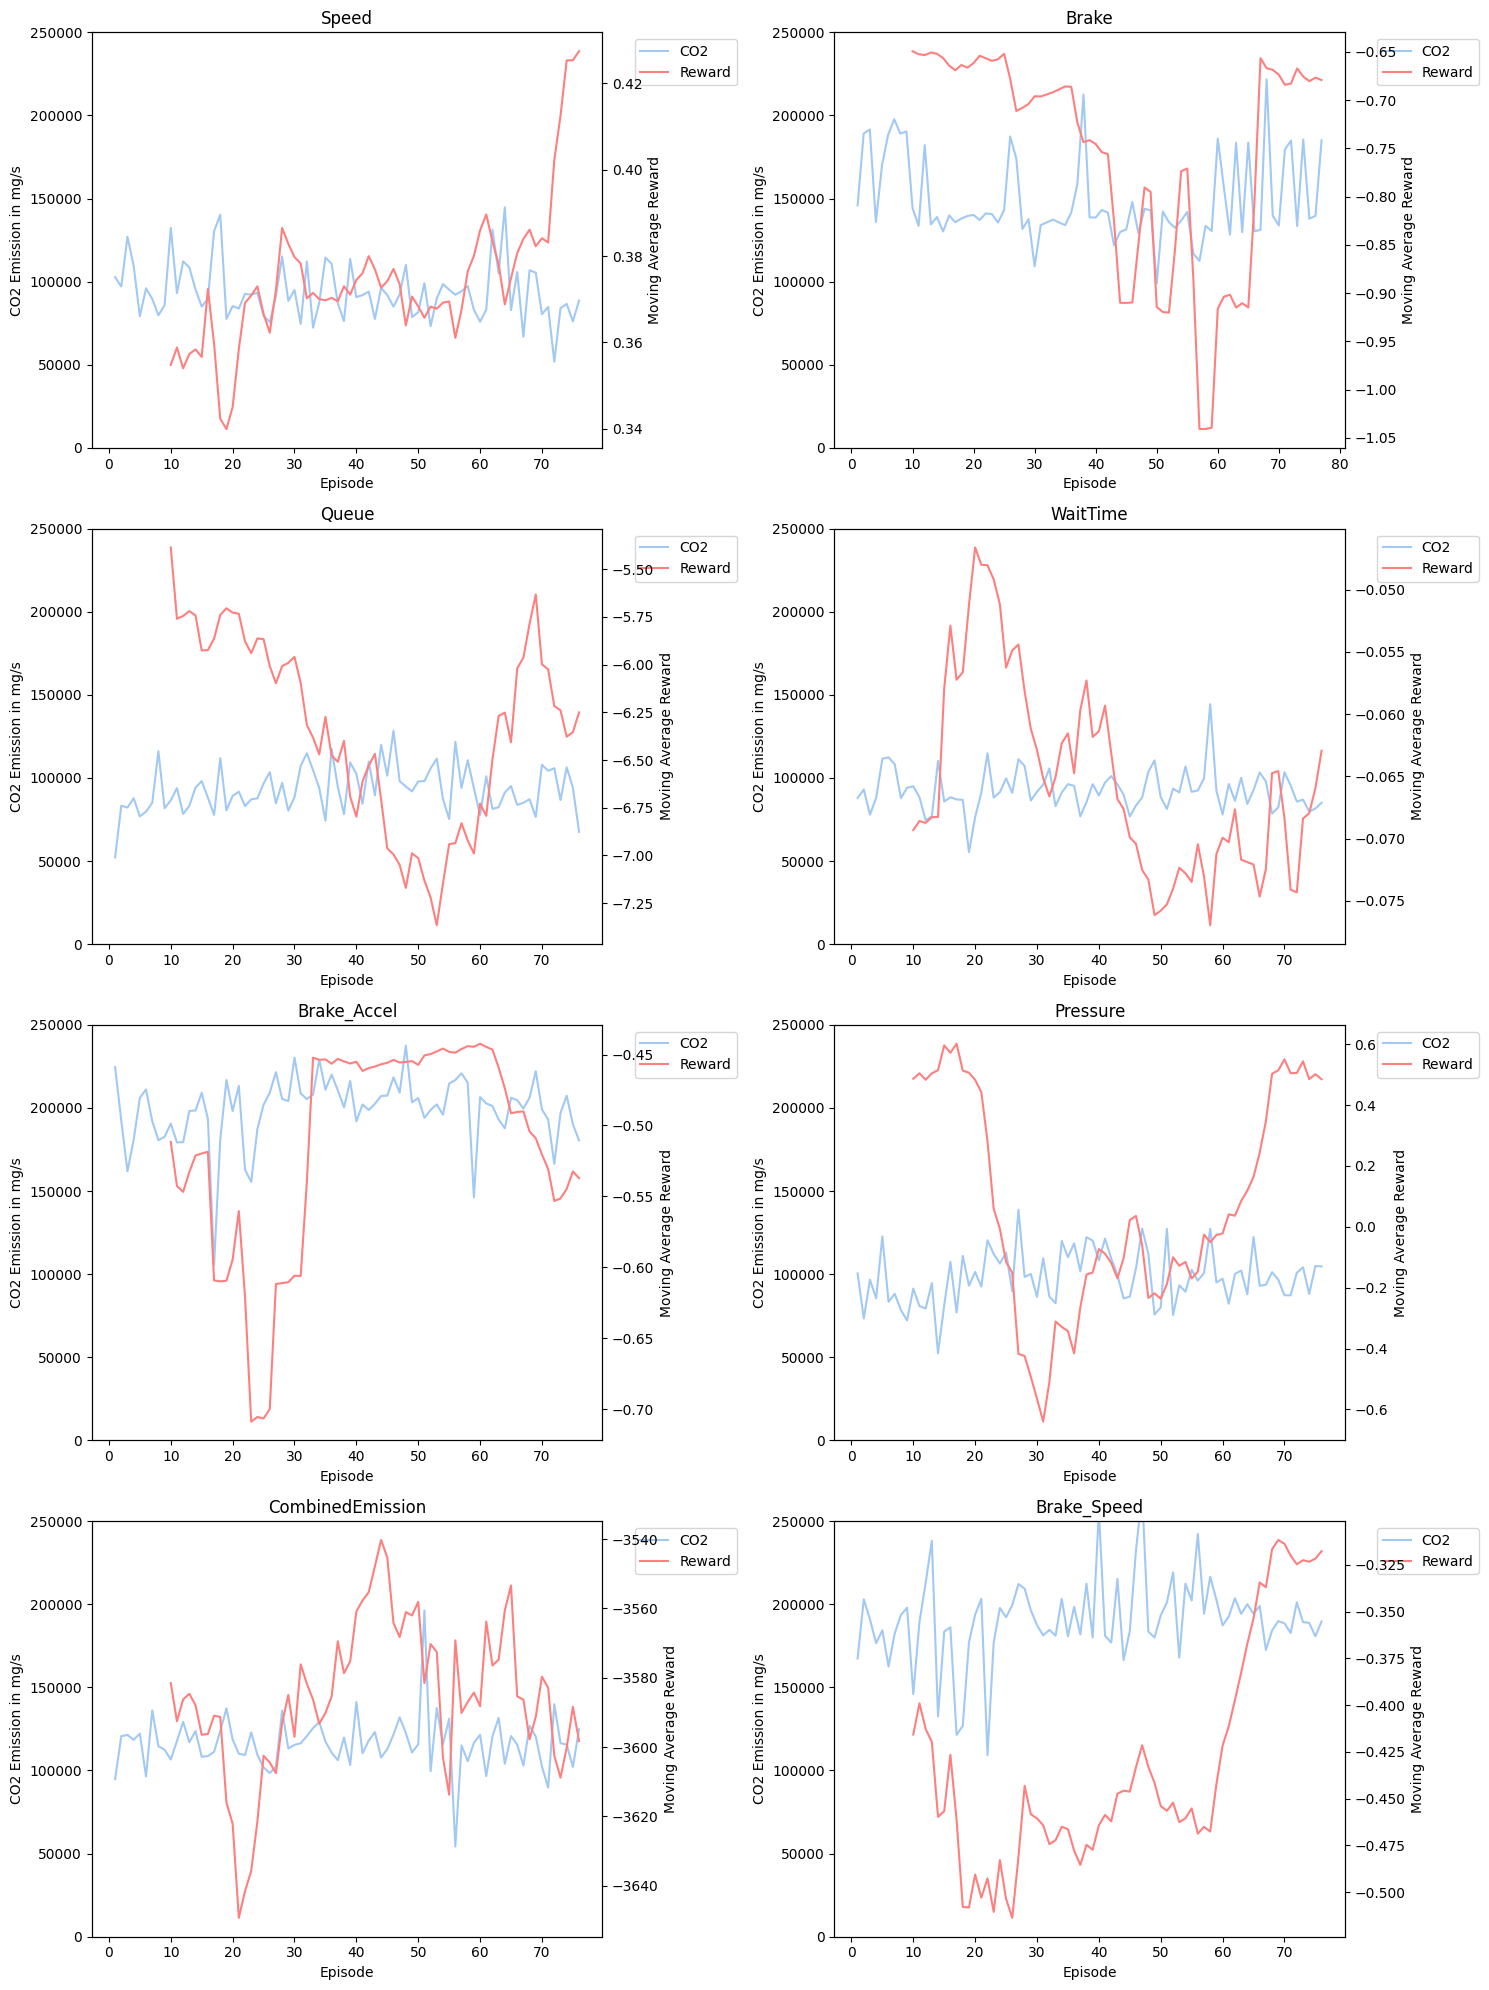

In [176]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# List of dataframes and their names
dfs = [(df_speed, 'Speed'), (df_brake, 'Brake'), (df_queue, 'Queue'), (df_waitTime, 'WaitTime'), 
       (df_brake_accel, 'Brake_Accel'), (df_pressure, 'Pressure'), 
       (df_combinedEmission, 'CombinedEmission'), (df_brake_speed, 'Brake_Speed')]

fig, axs = plt.subplots(4, 2, figsize=(15, 20))

sns.set_palette("pastel")

# Iterate over the list of dataframes
for i, (df, name) in enumerate(dfs):
    # Group by episode and calculate the mean
    df_grouped = df.groupby('episode').mean().reset_index()
    
    df_grouped['system_last_reward'] = df_grouped['system_last_reward'].rolling(10).mean()

    # Create a subplot
    ax = axs[i // 2, i % 2]
    
    sns.lineplot(x='episode', y='system_local_CO2', data=df_grouped, ax=ax)
    ax.set_xlabel('Episode')
    ax.set_ylabel('CO2 Emission in mg/s')
    ax.set_title(name)
    
    # Get the y-axis limits for CO2 emission
    co2_y_range = (0, 250000)
    ax.set_ylim(co2_y_range)
    
    ax2 = ax.twinx()
    sns.lineplot(x='episode', y='system_last_reward', data=df_grouped, ax=ax2, color='#ff7f7f')
    ax2.set_ylabel('Moving Average Reward')

    co2_line = plt.Line2D([], [], color=sns.color_palette("pastel")[0], label='CO2')
    reward_line = plt.Line2D([], [], color='#ff7f7f', label='Reward')
    ax.legend(handles=[co2_line, reward_line], loc='upper left', bbox_to_anchor=(1.05, 1))

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


In [189]:
import pandas as pd


dfs = [(df_speed, 'Speed'), (df_brake, 'Brake'), (df_queue, 'Queue'), (df_waitTime, 'WaitTime'),
       (df_brake_accel, 'Brake_Accel'), (df_pressure, 'Pressure'),
       (df_combinedEmission, 'CombinedEmission'), (df_brake_speed, 'Brake_Speed')]

# Significance level
alpha = 0.05

# Iterate through the DataFrames and calculate Pearson correlation
for df, df_name in dfs:
    # Select relevant columns
    df_subset = df[['system_local_CO2', 'system_last_reward']]
    
    # Drop rows with NaN values, if any
    df_subset.dropna(inplace=True)
    
    # Calculate Pearson correlation coefficient and p-value
    correlation_coefficient, p_value = pearsonr(df_subset['system_local_CO2'], df_subset['system_last_reward'])
    
    # Print the results
    print(f"Correlation for {df_name}:")
    print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
    print(f"P-Value: {p_value}")
    
    # Check for statistical significance
    if p_value < alpha:
        print("Statistically significant correlation (p < 0.05)")
    else:
        print("No statistically significant correlation (p >= 0.05)")
    
    print("=" * 30)


Correlation for Speed:
Pearson Correlation Coefficient: -0.4136960811642535
P-Value: 0.0
Statistically significant correlation (p < 0.05)
Correlation for Brake:
Pearson Correlation Coefficient: 0.02713986022121289
P-Value: 2.2589834069088266e-12
Statistically significant correlation (p < 0.05)
Correlation for Queue:
Pearson Correlation Coefficient: -0.8709924241142718
P-Value: 0.0
Statistically significant correlation (p < 0.05)
Correlation for WaitTime:
Pearson Correlation Coefficient: -0.07030249569165546
P-Value: 1.6644457141246335e-73
Statistically significant correlation (p < 0.05)
Correlation for Brake_Accel:
Pearson Correlation Coefficient: 0.0323879103527725
P-Value: 5.421027874150336e-17
Statistically significant correlation (p < 0.05)
Correlation for Pressure:
Pearson Correlation Coefficient: -0.26355379965192893
P-Value: 0.0
Statistically significant correlation (p < 0.05)
Correlation for CombinedEmission:
Pearson Correlation Coefficient: -0.2758746728436083
P-Value: 0.0
Sta

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_54029/2487284039.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.dropna(inplace=True)
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_54029/2487284039.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.dropna(inplace=True)
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_54029/2487284039.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

In [159]:
import pandas as pd

# Group the dataframe by 'episode' and calculate the average and cumulative sum
df_grouped = df_queue.groupby('episode').mean().reset_index()


/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_2297/2087623348.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df_queue.groupby('episode').mean().reset_index()


In [160]:
df_grouped['system_last_reward'] = df_grouped['system_last_reward'].cumsum()

In [141]:
df_grouped['system_local_CO2'] = df_speed.groupby('episode')['system_local_CO2'].mean()

In [161]:
df_grouped

episode     step  system_total_stopped  system_total_waiting_time  \
0         1  25772.5            238.774510                 112.475490   
1         2  27480.0            589.754781                1116.913386   
2         3  27480.0            520.305962                1350.408324   
3         4  27480.0            598.227222                1684.452193   
4         5  27480.0            527.131609                 916.326209   
..      ...      ...                   ...                        ...   
71       72  27480.0            538.398200                2759.545557   
72       73  27480.0            555.296963                1578.527559   
73       74  27480.0            557.262092                3206.355456   
74       75  27482.5            528.170045                2251.834459   
75       76  27480.0            576.910011                 975.440945   

    system_mean_waiting_time  system_mean_speed  system_total_CO2  \
0                   2.615709           5.010682      2.581409e+06   
1                  25.974730           3.744950      4.293564e+06   
2                  31.404845           3.941207      4.096865e+06   
3                  39.173307           3.692825      4.269721e+06   
4                  21.309912           3.910518      4.122433e+06   
..                       ...                ...               ...   
71                 64.175478           3.880771      4.143949e+06   
72                 36.709943           3.826304      4.181614e+06   
73                 74.566406           3.826854      4.162963e+06   
74                 52.368243           3.925579      4.115228e+06   
75                 22.684673           3.775700      4.236450e+06   

    system_total_PMx  system_total_NOx  system_total_noise_emission  ...  \
0         351.441309      15230.817574                 32137.623379  ...   
1         601.121197      24959.372498                 57291.810643  ...   
2         569.099359      23842.974250                 54011.537276  ...   
3         600.819832      24894.434874                 57005.311128  ...   
4         576.140316      24085.581024                 54386.233487  ...   
..               ...               ...                          ...  ...   
71        585.106328      24413.748717                 54582.435960  ...   
72        587.350572      24473.801359                 55329.789321  ...   
73        584.744028      24359.371651                 55085.685790  ...   
74        573.110064      23981.876153                 54331.834071  ...   
75        597.127309      24791.929273                 56374.058586  ...   

    tls_160_reward  tls_161_stopped  tls_161_accumulated_waiting_time  \
0        -1.053922         0.210784                         27.843137   
1        -1.336333         0.374578                         63.723285   
2        -1.503937         0.532058                         67.013498   
3        -1.118110         0.447694                         55.030371   
4        -1.193476         0.476940                         63.001125   
..             ...              ...                               ...   
71       -4.321710         0.570304                         75.626547   
72       -1.422947         0.528684                         61.174353   
73       -3.840270         0.590551                         73.247469   
74       -2.012387         0.577703                         69.802928   
75       -1.337458         0.420697                         68.235096   

    tls_161_average_speed  tls_161_braking  tls_161_acceleration  \
0                0.752099        -1.162165              0.308236   
1                0.609488        -1.644349              0.516259   
2                0.540301        -1.833735              0.488449   
3                0.592472        -1.370898              0.423975   
4                0.595425        -1.619377              0.491553   
..                    ...              ...                   ...   
71               0.538250       

### Best and Worst Episodes

In [66]:
# get episodes with highest and lowest reward for each reward type

# get average highest

df_speed.groupby('episode').mean()['system_last_reward'].sort_values()#.max()

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_29567/407404027.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_speed.groupby('episode').mean()['system_last_reward'].sort_values()#.max()


episode
18    0.233935
1     0.240096
6     0.253534
64    0.264214
17    0.277962
        ...   
68    0.427190
67    0.431364
59    0.437651
70    0.443498
72    0.535844
Name: system_last_reward, Length: 76, dtype: float64

In [68]:
df_speed[df_speed['episode'] == 72|73]

step  system_total_stopped  system_total_waiting_time  \
64200  25260.0                     0                        0.0   
64201  25265.0                     1                        1.0   
64202  25270.0                     1                        6.0   
64205  25285.0                     0                        0.0   
64206  25290.0                     0                        0.0   
...        ...                   ...                        ...   
65084  29680.0                     0                     4266.0   
65085  29685.0                     0                     4365.0   
65086  29690.0                     1                     4474.0   
65087  29695.0                     0                     4455.0   
65088  29700.0                     1                     4303.0   

       system_mean_waiting_time  system_mean_speed  system_total_CO2  \
64200                  0.000000          11.608878      3.874198e+05   
64201                  0.023256           0.050638      4.958768e+05   
64202                  0.139535           0.000000      4.836004e+05   
64205                  0.000000           7.339628      5.610227e+05   
64206                  0.000000          11.707905      6.773868e+05   
...                         ...                ...               ...   
65084                 99.209302          12.701464      6.188969e+06   
65085                101.511628           4.453409      6.193058e+06   
65086                104.046512           0.001366      5.984492e+06   
65087                103.604651           4.603346      5.855198e+06   
65088                100.069767           0.000000      5.914101e+06   

       system_total_PMx  system_total_NOx  system_total_noise_emission  \
64200         46.717518       2054.799644                  5033.535131   
64201         65.060259       2966.620457                  5479.816174   
64202         60.375092       2694.376420                  5808.107552   
64205         79.503381       3432.661491                  6899.224607   
64206         84.549698       3831.319356                  7372.759828   
...                 ...               ...                          ...   
65084        884.644898      36228.327774                 83292.668252   
65085        883.677884      36186.901698                 83075.652310   
65086        858.278472      34879.772787                 83004.404678   
65087        854.707032      34241.551459                 82656.699879   
65088        868.955844      34781.665339                 82578.057019   

       system_local_CO2  system_local_CO  system_local_HC  system_local_PMx  \
64200      13054.262914        20.605153         0.000000          2.596753   
64201       7368.125069        15.182258         0.000000          2.206094   
64202       7380.555556        15.200000         0.000000          2.208889   
64205      27214.748164        36.673709         0.000000          4.414962   
64206      11120.134497        18.447955         0.000000          2.360791   
...                 ...              ...              ...               ...   
65084     152844.002092      2704.015327        12.579606         23.898360   
65085      98321.513835      2803.826448        13.377484         16.594007   
65086     138724.340903      2778.671183        12.920585         24.129513   
65087     138158.898579      2899.212892        13.578361         22.369228   
65088     112447.359061      2711.773634        12.803394         18.275470   

       system_local_NOx  system_local_noise_emission  system_local_#vehicles  \
64200        115.702272                    74.122497                     1.0   
64201         84.732841                    65.043562                     1.0   
64202         84.888889                    67.110671                     1.0   
64205        231.297497                    76.913604                     1.0   
64206        100.476979                    73.853762                     1.0   
...                 ..

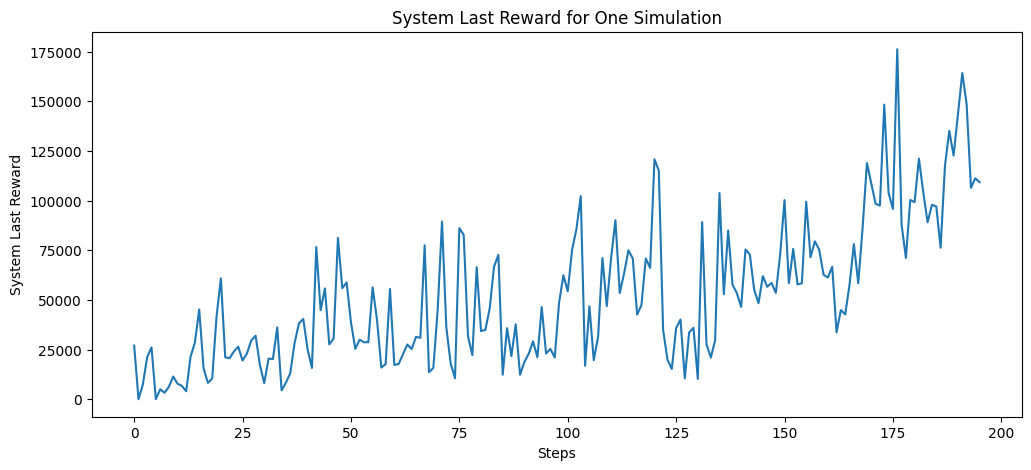

In [69]:
# get values for episode 72 

df_speed[df_speed['episode'] == 72].describe()

# plot system last reward for episode 72

episode72 = df_speed[df_speed['episode'] == 72].reset_index()

plt.figure(figsize=(12,5))

#TODO second axis

#plt.plot(episode72.index, episode72['system_last_reward'], label='system_last_reward', color='#ff7f7f')
plt.plot(episode72.index, episode72['system_local_CO2'], label='CO2', color='#1f77b4')
    
plt.xlabel('Steps')
plt.ylabel('System Last Reward')
plt.title('System Last Reward for One Simulation')
plt.show()

In [ ]:
# Plot the average CO2 emissions for each episode
plt.figure(figsize=(40, 20))
fig, ax1 = plt.subplots()

# Plot CO2 emissions on primary y-axis
ax1.plot(range(1, len(avg_co2_emissions_159) + 1), avg_co2_emissions_159, alpha=0.5, label='tls_159')
ax1.plot(range(1, len(avg_co2_emissions_160) + 1), avg_co2_emissions_160, alpha=0.5, label='tls_160')
ax1.plot(range(1, len(avg_co2_emissions_161) + 1), avg_co2_emissions_161, alpha=0.5, label='tls_161')

# Labels for first graph
ax1.set_xlabel('Episode')
ax1.set_ylabel('Average CO2 (g)')
ax1.legend(['tls_159', 'tls_160', 'tls_161'])

# Create secondary y-axis
ax2 = ax1.twinx()

# Plot system_last_reward on secondary y-axis
ax2.plot(avg_sys_last_reward, color='purple', linestyle='--', alpha=0.5, label='system_last_reward')

# Label for second graph
ax2.set_ylabel('Average System Reward')
ax2.legend(loc='upper right')

plt.show()

In [32]:
pd.set_option('display.max_columns', None)

In [34]:
# get total highest reward

df_speed[(df_speed['system_last_reward'] == df_speed['system_last_reward'].max())]

step  system_total_stopped  system_total_waiting_time  \
20742  25295.0                     0                        0.0   

       system_mean_waiting_time  system_mean_speed  system_total_CO2  \
20742                       0.0          13.480496      697837.80623   

       system_total_PMx  system_total_NOx  system_total_noise_emission  \
20742         82.722042        3702.26176                  7897.707238   

       system_local_CO2  system_local_CO  system_local_HC  system_local_PMx  \
20742      25952.926113        34.795078              0.0          4.105622   

       system_local_NOx  system_local_noise_emission  system_local_#vehicles  \
20742        214.292443                    77.232676                     1.0   

           system_local_avgSpeedsperType system_local_veh_types  \
20742  {'truck_truck': 13.4804956682007}          ['truck3602']   

       system_local_avg_speed  system_last_reward  \
20742                9.682105            0.999972   

       total_brake_traffic_signals  local_acceleration  tls_159_stopped  \
20742                          0.0            0.453194                0   

       tls_159_accumulated_waiting_time  tls_159_average_speed  \
20742                               2.0               0.999916   

       tls_159_braking  tls_159_acceleration  \
20742              0.0              0.453194   

                        tls_159_controlled_lane_emission  tls_159_phase  \
20742  {'CO2_emission': 51905.852225007184, 'CO_emiss...              0   

              tls_159_state  tls_159_reward  tls_160_stopped  \
20742  GGGgrrrrrrgGgGGrrrrr        0.999916                0   

       tls_160_accumulated_waiting_time  tls_160_average_speed  \
20742                               0.0                    1.0   

       tls_160_braking  tls_160_acceleration tls_160_controlled_lane_emission  \
20742              0.0                   0.0                               []   

       tls_160_phase            tls_160_state  tls_160_reward  \
20742              0  rgGgGrrrrrrrrrrrrrrrrrr             1.0   

       tls_161_stopped  tls_161_accumulated_waiting_time  \
20742                0                               0.0   

       tls_161_average_speed  tls_161_braking  tls_161_acceleration  \
20742                    1.0              0.0                   0.0   

      tls_161_controlled_lane_emission  tls_161_phase  \
20742                               []              0   

                 tls_161_state  tls_161_reward  agents_total_stopped  \
20742  ggggggggggrrggggggggggg             1.0                     0   

       agents_total_accumulated_waiting_time  episode  
20742                                    2.0       24

In [317]:
brakeAccel = pd.DataFrame()
for file in os.listdir(inputdir):
    
    # create dataframe for all files that start with avg_speed
    if file.startswith('avg_brake_NEW'):
        temp_df_ba = pd.read_csv(os.path.join(inputdir, file))
        temp_df_ba['episode'] = i_speed # add episode column
        brakeAccel = brakeAccel.append(temp_df_ba, ignore_index=True)
        i_speed += 1

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_29567/2332994737.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  brakeAccel = brakeAccel.append(temp_df_ba, ignore_index=True)
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_29567/2332994737.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  brakeAccel = brakeAccel.append(temp_df_ba, ignore_index=True)
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_29567/2332994737.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  brakeAccel = brakeAccel.append(temp_df_ba, ignore_index=True)
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_29567/2332994737.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pan

In [318]:
brakeAccel[['system_local_CO2', 'system_local_CO', 'system_local_PMx','system_local_NOx', 'system_local_HC']].describe()

system_local_CO2  system_local_CO  system_local_PMx  system_local_NOx  \
count      67792.000000     67792.000000      67792.000000      67792.000000   
mean      188007.675749      6038.940322         30.320436       1113.074895   
std        62027.269709      1989.132137         11.624510        429.850184   
min            0.000000         0.000000          0.000000          0.000000   
25%       166837.944255      5479.553726         24.530083        892.669745   
50%       199576.666667      6342.597222         32.784928       1197.085825   
75%       226437.500000      7167.269444         37.940945       1388.899444   
max       408852.786508     13418.622838         69.447979       2678.412611   

       system_local_HC  
count     67792.000000  
mean         32.138571  
std          11.180085  
min           0.000000  
25%          27.841985  
50%          33.867777  
75%          39.361551  
max          72.739794

### Phase Transition Matrix

In [403]:
# Define the possible states for each traffic light
tls_159_states = ["GGGgrrrrrrgGgGGrrrGG",
        "GGGgrrrrrrgGgGGrrrrr",
        "yyygrrrrrryyyyyrrrrr",
        "GGGGrrrrrrrrrrrrrrrr",
        "yyyyrrrrrrrrrrrrrrrr",
        "rrrrgGGGrrrrrrrGGGrG",
        "rrrrgGGGrrrrrrrGrrrr",
        "rrrryyyyrrrrrrryrrrr",
        "rrrrrrrrggrrrrrrGGGr",
        "rrrrrrrrggrrrrrrrrrr",
        "rrrrrrrryyrrrrrrrrrr"]

tls_160_states = ["rgGgGrrrrrrrrrrrGGrGGrG",
        "rgGgGrrrrrrrrrrrrrrrrrr",
        "ryyyyrrrrrrrrrrrrrrrrrr",
        "rrrrrgrrrrrrggGGGGGrGGr",
        "rrrrrgrrrrrrggGGrrrrrrr",
        "rrrrryrrrrrryyyyrrrrrrr",
        "grrrrrGGgGGgrrrrrGGrrGG",
        "grrrrrGGgGGgrrrrrrrrrrr",
        "grrrrryyyyyyrrrrrrrrrrr",
        "Grrrrrrrrrrrrrrrrrrrrrr",
        "yrrrrrrrrrrrrrrrrrrrrrr"]

tls_161_states = ["yyyyyyryyyrrrrrrrrrrrry",
        "rrrrrrrrrrrrrrrrrrrrrry",
        "rrrrrrrrrrrrrrrrrrrrrrr",
        "ggggggggggrrggggggggggg",
        "rrrrrrryrryyrrrrrryyrrr",
        "rrrrrrrgrrggrrrrrrggrrr",
        "rrrrrrrrrrrrrrrrrryyrrr",
        "rrrrrrrrrrrrrrrrrrrrrrr",
        "yyyyyyyryyrrrrrrrrrrgrr",
        "gggggggrggrrrrrrrrrrgrr",
        "ggggggggggrrrrrrrrrrgry",
        "ggggggggggrrrrrrrrrrgrg",
        "ggggggyryyrrrrrrrrrrrrg",
        "yyyyyyrrrrrrrrrrrrrrrrg",
        "yyyyyyrrrrrrrrrrrrrrrry"]

In [118]:
# get an overview of the states used before plotting

num_states_tl1 = df_speed['tls_159_state'].value_counts().sort_index()
num_states_tl2 = df_speed['tls_160_state'].value_counts().sort_index()
num_states_tl3 = df_speed['tls_161_state'].value_counts().sort_index()


In [119]:
num_states_tl1

GGGGrrrrrrrrrrrrrrrr     2001
GGGgrrrrrrgGgGGrrrGG     1463
GGGgrrrrrrgGgGGrrrrr    41647
rrrrgGGGrrrrrrrGGGrG     1092
rrrrgGGGrrrrrrrGrrrr    17013
rrrrrrrrggrrrrrrGGGr     2464
rrrrrrrrggrrrrrrrrrr      622
Name: tls_159_state, dtype: int64

In [120]:
num_states_tl2

Grrrrrrrrrrrrrrrrrrrrrr      856
grrrrrGGgGGgrrrrrGGrrGG    17972
grrrrrGGgGGgrrrrrrrrrrr     6402
rgGgGrrrrrrrrrrrGGrGGrG     1990
rgGgGrrrrrrrrrrrrrrrrrr    26706
rrrrrgrrrrrrggGGGGGrGGr    10537
rrrrrgrrrrrrggGGrrrrrrr     1839
Name: tls_160_state, dtype: int64

In [121]:
num_states_tl3

ggggggggggrrggggggggggg    48663
ggggggggggrrrrrrrrrrgrg     5436
gggggggrggrrrrrrrrrrgrr     3280
rrrrrrrgrrggrrrrrrggrrr     8923
Name: tls_161_state, dtype: int64

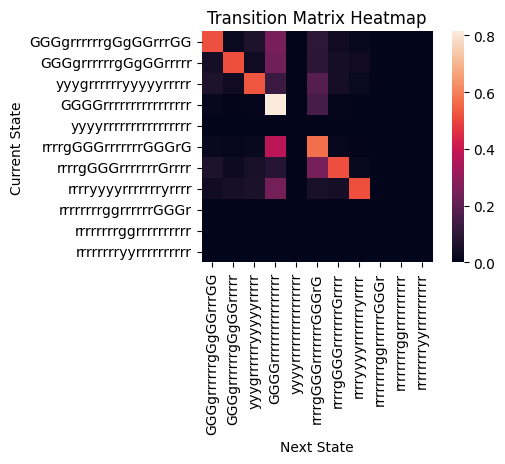

In [234]:
# create transition matrix and plot heatmap

def transition_matrix(transitions, num_phases):
    phases = list(set(phase for transition in transitions for phase in transition))
    phase_to_index = {phase: index for index, phase in enumerate(phases)}
    matrix = [[0] * num_phases for _ in range(num_phases)]
    for (phase1, phase2) in transitions:
        i = phase_to_index[phase1]
        j = phase_to_index[phase2]
        matrix[i][j] += 1
    return matrix

def normalize_matrix(matrix):
        for row in matrix:
            total = sum(row)
            if total > 0:  # Avoid division by zero
                row[:] = [f/total for f in row]
        return matrix

def create_heatmap(matrix, states):
    plt.figure(figsize=(5, 3))  # adjust the size as needed
    sns.heatmap(matrix,square=True, xticklabels=states, yticklabels=states)
    plt.xlabel("Next State")
    plt.ylabel("Current State")
    plt.title("Transition Matrix Heatmap")
    plt.show()

# append all states collected during training to list
tls_159_allStates = df_speed['tls_159_state'].tolist()
tls_159_allStates.append(x for x in tls_159_states if x not in tls_159_allStates)

# get number of distinct phases
num_phases = len(tls_159_states)

# create list of tuples for state transitions
transitions = [(tls_159_allStates[i], tls_159_allStates[i+1]) for i in range(len(tls_159_allStates)-1)]

# create transition matrix
matrix = transition_matrix(transitions, num_phases)

# normalize matrix
transition_matrix = normalize_matrix(matrix)  # assuming you already have the transition matrix

# plot heatmap
create_heatmap(transition_matrix, tls_159_states)

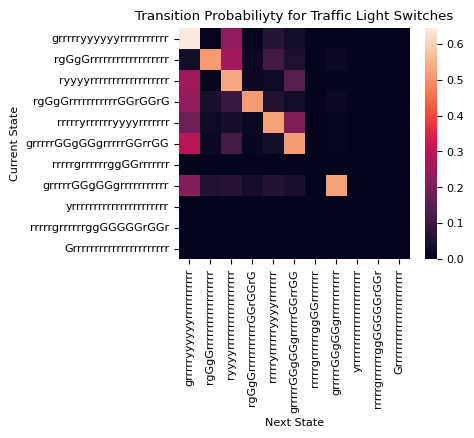

In [555]:
# create transition matrix and plot heatmap

def transition_matrix(transitions, num_phases):
    phases = list(set(phase for transition in transitions for phase in transition))
    phase_to_index = {phase: index for index, phase in enumerate(phases)}
    matrix = [[0] * num_phases for _ in range(num_phases)]
    for (phase1, phase2) in transitions:
        i = phase_to_index[phase1]
        j = phase_to_index[phase2]
        matrix[i][j] += 1
    return matrix

def normalize_matrix(matrix):
        for row in matrix:
            total = sum(row)
            if total > 0:  # Avoid division by zero
                row[:] = [f/total for f in row]
        return matrix

def create_heatmap(matrix, states):
    plt.figure(figsize=(4, 3))  # adjust the size as needed
    sns.heatmap(matrix,square=True, xticklabels=states, yticklabels=states)
    plt.xlabel("Next State")
    plt.ylabel("Current State")
    plt.title("Transition Probabiliyty for Traffic Light Switches")
    plt.show()

# append all states collected during training to list
tls_160_allStates = df_speed['tls_160_state'].tolist()
tls_160_allStates.append(x for x in set(tls_160_states) if x not in tls_160_allStates)

# get number of distinct phases
num_phases = len(set(tls_160_states))

# create list of tuples for state transitions
transitions = [(tls_160_allStates[i], tls_160_allStates[i+1]) for i in range(len(tls_160_allStates)-1)]

# create transition matrix
matrix = transition_matrix(transitions, num_phases)

# normalize matrix
transition_matrix = normalize_matrix(matrix)  # assuming you already have the transition matrix

# plot heatmap
create_heatmap(transition_matrix, set(tls_160_states))

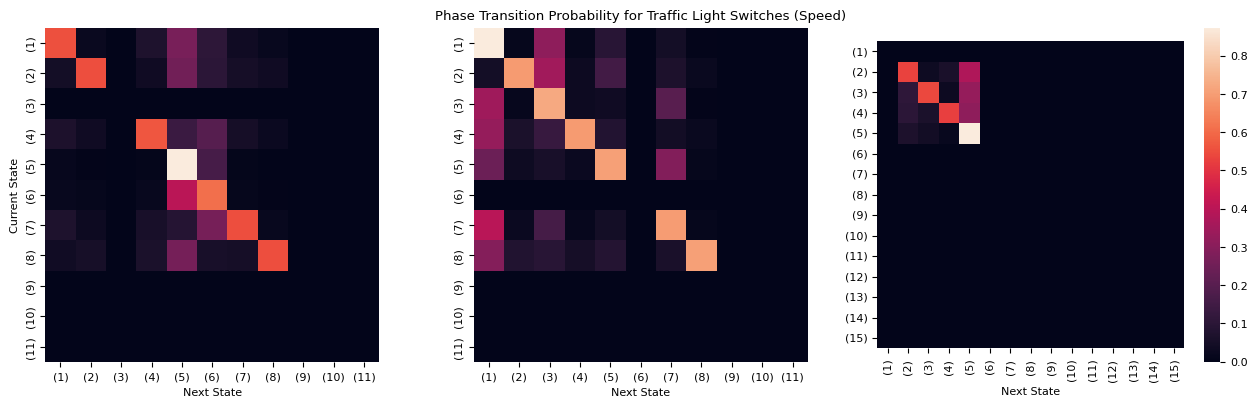

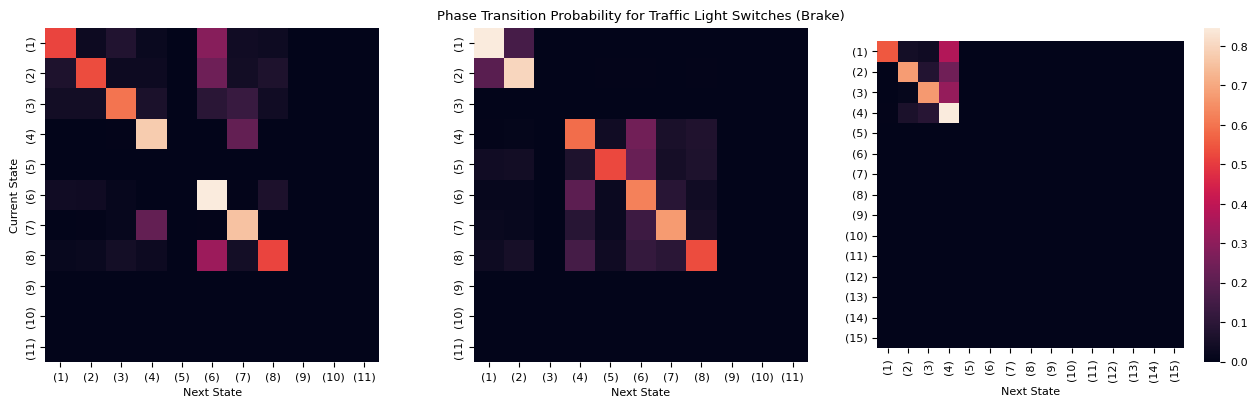

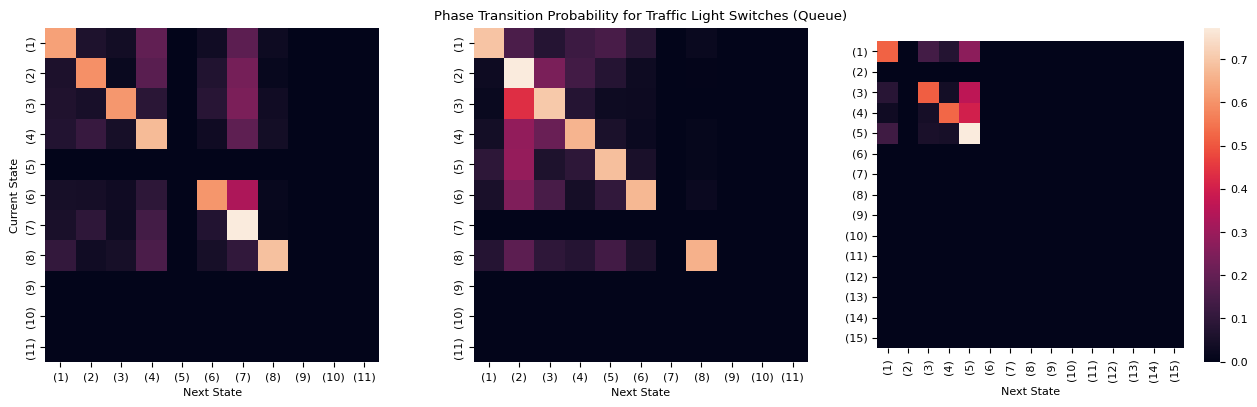

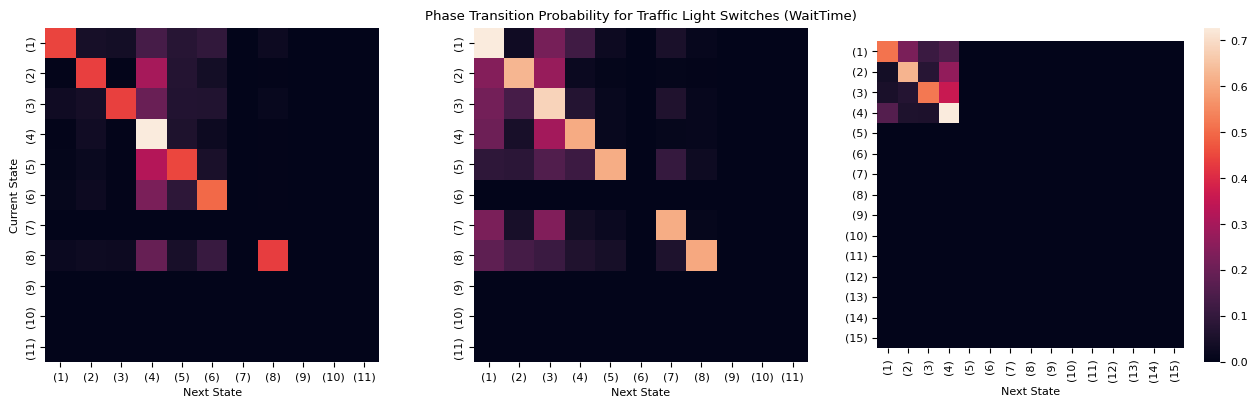

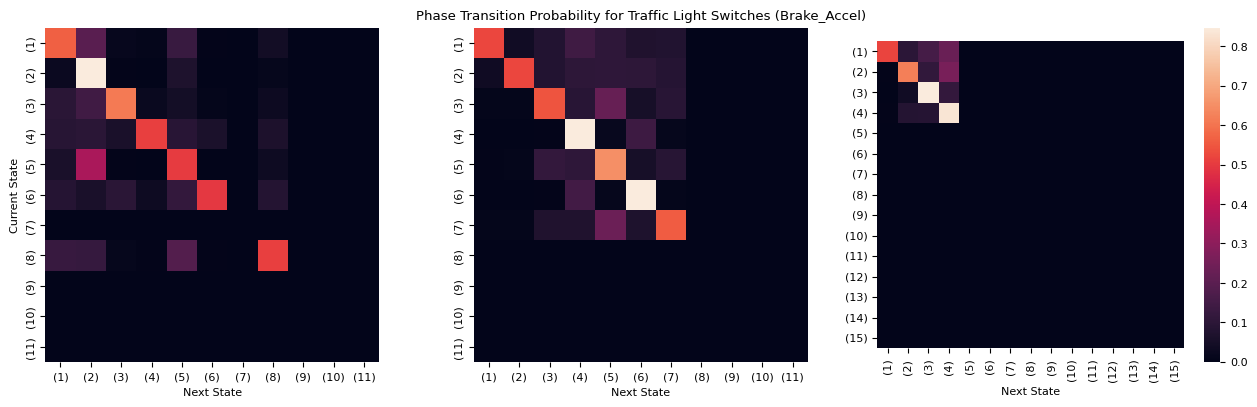

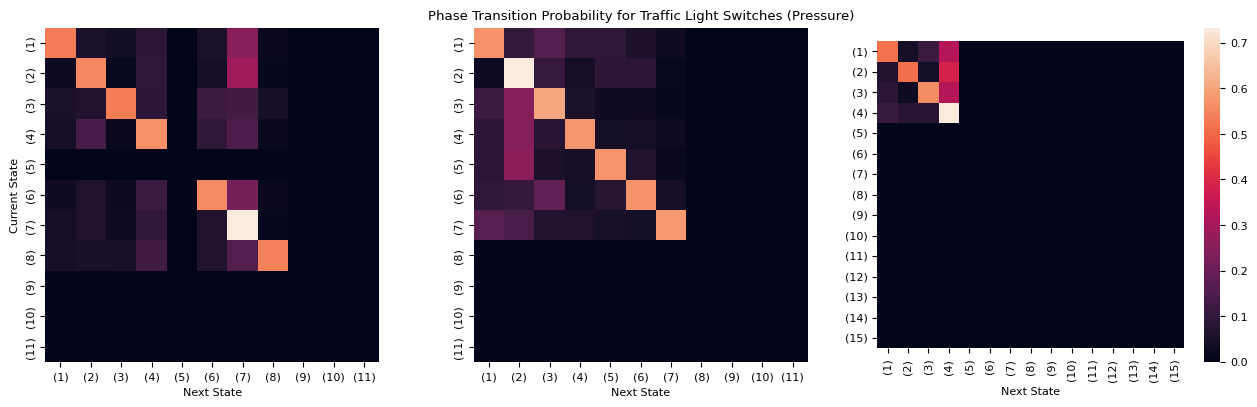

In [554]:
### ------ Phase Transition Matrix sorted by Reward Type ------ ###

# Create a figure with subplots based on the number of dataframes
tls_list = ['tls_159_state', 'tls_160_state', 'tls_161_state'] # list of all possible states
unique_state_lists = [tls_159_states, tls_160_states, tls_161_states] # list of lists of unique states for each traffic light
df_list = [(df_speed, 'Speed'), (df_brake, 'Brake'), (df_queue, 'Queue'), (df_waitTime, 'WaitTime'), 
       (df_brake_accel, 'Brake_Accel'), (df_pressure, 'Pressure'), 
       (df_combinedEmission, 'CombinedEmission'), (df_brake_speed, 'Brake_Speed')] # list of dataframes


for (df, name) in df_list:
    j = 0
    num_dataframes = len(tls_list)
    fig, axs = plt.subplots(1, num_dataframes, figsize=(13, 4))

    # Iterate over the dataframes and plot each one in a subplot
    for i, col in enumerate(tls_list):
        # create transition matrix and plot heatmap

        def transition_matrix(transitions, num_phases):
            phases = list(set(phase for transition in transitions for phase in transition))
            phase_to_index = {phase: index for index, phase in enumerate(phases)}
            matrix = [[0] * num_phases for _ in range(num_phases)]
            for (phase1, phase2) in transitions:
                i = phase_to_index[phase1]
                j = phase_to_index[phase2]
                matrix[i][j] += 1
            return matrix

        # def normalize_matrix(matrix):
        #     for row in matrix:
        #         total = sum(row)
        #         if total > 0:  # Avoid division by zero
        #             row[:] = [f/total for f in row]
        #     return matrix

        def normalize_matrix(matrix):
            normalized_matrix = []
            for row in matrix:
                row_sum = sum(row)
                if row_sum != 0:
                    normalized_row = [value / row_sum for value in row]
                else:
                    normalized_row = [0] * len(row)
                normalized_matrix.append(normalized_row)
            return normalized_matrix


        
        def create_heatmap(matrix, states, ax):
            sns.heatmap(matrix, square=True, xticklabels=["({0})".format(i+1) for i in range(num_phases)], yticklabels=["({0})".format(i+1) for i in range(num_phases)], ax=ax, cbar=i==num_dataframes-1, cbar_ax=None if i == num_dataframes-1 else False)
            ax.set_xlabel("Next State")
            ax.set_ylabel("Current State" if i == 0 else "")

            ax.set_title(f"Phase Transition Probability for Traffic Light Switches ({name})" if i == 1 else "")
            #ax.set_aspect("equal")

        # append all states collected during training to list
        tls_allStates = df[col].tolist()
        tls_allStates.append(x for x in unique_state_lists[j] if x not in tls_allStates)

        # get number of distinct phases
        num_phases = len(unique_state_lists[j])

        # create list of tuples for state transitions
        transitions = [(tls_allStates[i], tls_allStates[i+1]) for i in range(len(tls_allStates)-1)]

        # create transition matrix
        matrix = transition_matrix(transitions, num_phases)
        #print(matrix)

        # normalize matrix
        transition_matrix = normalize_matrix(matrix)  # assuming you already have the transition matrix

        # plot heatmap in the corresponding subplot
        create_heatmap(transition_matrix, unique_state_lists[j], axs[i])
        
        j += 1

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the figure
    plt.show()


# plot heatmap
#create_heatmap(transition_matrix, set(tls_160_states))

In [511]:
### ------ Phase Transition Matrix tls_159 ------ ###

# Create a figure with subplots based on the number of dataframes
tls_list = ['tls_159_state', 'tls_160_state', 'tls_161_state'] # list of all possible states
unique_state_lists = [tls_159_states, tls_160_states, tls_161_states] # list of lists of unique states for each traffic light
df_list = [(df_speed, 'Speed'), (df_queue, 'Queue'), (df_waitTime, 'WaitTime')] # list of dataframes

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(9, 3.5))

for i, (df, name) in enumerate(df_list):
    
    # num_dataframes = len(tls_list)
    # fig, axs = plt.subplots(1, num_dataframes, figsize=(5*num_dataframes, 5))

    def transition_matrix(transitions, num_phases):
        phases = list(set(phase for transition in transitions for phase in transition))
        phase_to_index = {phase: index for index, phase in enumerate(phases)}
        matrix = [[0] * num_phases for _ in range(num_phases)]
        for (phase1, phase2) in transitions:
            i = phase_to_index[phase1]
            j = phase_to_index[phase2]
            matrix[i][j] += 1
        return matrix

    def normalize_matrix(matrix):
        normalized_matrix = []
        for row in matrix:
            row_sum = sum(row)
            if row_sum != 0:
                normalized_row = [value / row_sum for value in row]
            else:
                normalized_row = [0] * len(row)
            normalized_matrix.append(normalized_row)
        return normalized_matrix

    def create_heatmap(matrix, states, ax):
        sns.heatmap(matrix, square=True, xticklabels=tls_159_states, yticklabels=tls_159_states if i == 0 else "", ax=ax, cbar=i==num_dataframes-1, cbar_ax=None if i == num_dataframes-1 else False)
        ax.set_xlabel("Next State")
        ax.set_ylabel("Current State" if i == 0 else "")
        ax.set_title(f"{name}")

    # append all states collected during training to list
    tls_allStates = df['tls_159_state'].tolist()
    tls_allStates.append(x for x in tls_159_states if x not in tls_allStates)

    # get number of distinct phases
    num_phases = len(unique_state_lists[j])

    # create list of tuples for state transitions
    transitions = [(tls_allStates[i], tls_allStates[i+1]) for i in range(len(tls_allStates)-1)]

    # create transition matrix
    matrix = transition_matrix(transitions, num_phases)
    #print(matrix)

    # normalize matrix
    transition_matrix = normalize_matrix(matrix)  # assuming you already have the transition matrix

    # plot heatmap in the corresponding subplot
    create_heatmap(transition_matrix, tls_159_states, axs[i])

# Adjust the spacing between subplots

plt.tight_layout(pad=0.01)

# Show the figure
plt.show()


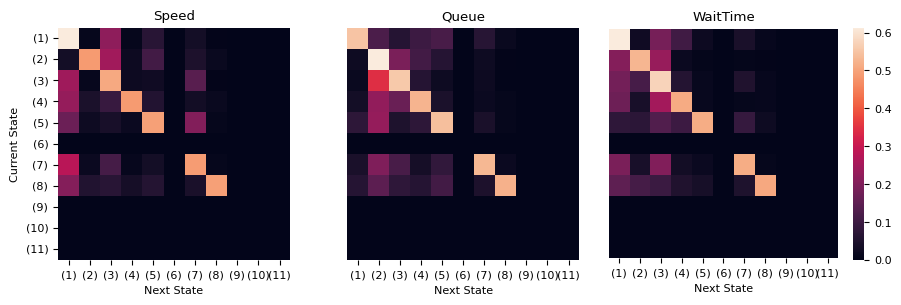

In [543]:
### ------ Phase Transition Matrix tls_160 ------ ###

# Create a figure with subplots based on the number of dataframes
tls_list = ['tls_159_state', 'tls_160_state', 'tls_161_state'] # list of all possible states
unique_state_lists = [tls_159_states, tls_160_states, tls_161_states] # list of lists of unique states for each traffic light
df_list = [(df_speed, 'Speed'), (df_queue, 'Queue'), (df_waitTime, 'WaitTime')] # list of dataframes

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(9.2 , 2.8))

for i, (df, name) in enumerate(df_list):
    
    # num_dataframes = len(tls_list)
    # fig, axs = plt.subplots(1, num_dataframes, figsize=(5*num_dataframes, 5))

    def transition_matrix(transitions, num_phases):
        phases = list(set(phase for transition in transitions for phase in transition))
        phase_to_index = {phase: index for index, phase in enumerate(phases)}
        matrix = [[0] * num_phases for _ in range(num_phases)]
        for (phase1, phase2) in transitions:
            i = phase_to_index[phase1]
            j = phase_to_index[phase2]
            matrix[i][j] += 1
        return matrix

    def normalize_matrix(matrix):
        normalized_matrix = []
        for row in matrix:
            row_sum = sum(row)
            if row_sum != 0:
                normalized_row = [value / row_sum for value in row]
            else:
                normalized_row = [0] * len(row)
            normalized_matrix.append(normalized_row)
        return normalized_matrix

    def create_heatmap(matrix, states, ax):
        sns.heatmap(matrix, square=True, xticklabels=["({0})".format(i+1) for i in range(num_phases)], yticklabels=["({0})".format(i+1) for i in range(num_phases)] if i == 0 else "", ax=ax, cbar=i==num_dataframes-1, cbar_ax=None if i == num_dataframes-1 else False)
        ax.set_xlabel("Next State")
        ax.set_ylabel("Current State" if i == 0 else "")
        ax.set_title(f"{name}")
        ax.tick_params(axis='x', rotation=0)

    # append all states collected during training to list
    tls_allStates = df['tls_160_state'].tolist()
    tls_allStates.append(x for x in tls_160_states if x not in tls_allStates)

    # get number of distinct phases
    num_phases = len(tls_160_states)

    # create list of tuples for state transitions
    transitions = [(tls_allStates[i], tls_allStates[i+1]) for i in range(len(tls_allStates)-1)]

    # create transition matrix
    matrix = transition_matrix(transitions, num_phases)
    #print(matrix)

    # normalize matrix
    transition_matrix = normalize_matrix(matrix)
    # plot heatmap in the corresponding subplot
    create_heatmap(transition_matrix, tls_160_states, axs[i])

# Adjust the spacing between subplots

plt.tight_layout(pad=0.01)

# Show the figure
plt.show()


In [549]:
### ------ Phase Transition Matrix tls_161 ------ ###

# Create a figure with subplots based on the number of dataframes
tls_list = ['tls_159_state', 'tls_160_state', 'tls_161_state'] # list of all possible states
unique_state_lists = [tls_159_states, tls_160_states, tls_161_states] # list of lists of unique states for each traffic light
df_list = [(df_speed, 'Speed'), (df_queue, 'Queue'), (df_waitTime, 'WaitTime')] # list of dataframes

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(10,3))

for i, (df, name) in enumerate(df_list):
    
    # num_dataframes = len(tls_list)
    # fig, axs = plt.subplots(1, num_dataframes, figsize=(5*num_dataframes, 5))

    def transition_matrix(transitions, num_phases):
        phases = list(set(phase for transition in transitions for phase in transition))
        phase_to_index = {phase: index for index, phase in enumerate(phases)}
        matrix = [[0] * num_phases for _ in range(num_phases)]
        for (phase1, phase2) in transitions:
            i = phase_to_index[phase1]
            j = phase_to_index[phase2]
            matrix[i][j] += 1
        return matrix

    def normalize_matrix(matrix):
        normalized_matrix = []
        for row in matrix:
            row_sum = sum(row)
            if row_sum != 0:
                normalized_row = [value / row_sum for value in row]
            else:
                normalized_row = [0] * len(row)
            normalized_matrix.append(normalized_row)
        return normalized_matrix

    def create_heatmap(matrix, states, ax):
        sns.heatmap(matrix, square=True, xticklabels=["({0})".format(i+1) for i in range(num_phases)], yticklabels=["({0})".format(i+1) for i in range(num_phases)] if i == 0 else "", ax=ax, cbar=i==num_dataframes-1, cbar_ax=None if i == num_dataframes-1 else False)
        ax.set_xlabel("Next State")
        ax.set_ylabel("Current State" if i == 0 else "")
        ax.set_title(f"{name}")
        ax.tick_params(axis='x', rotation=0)

    # append all states collected during training to list
    tls_allStates = df['tls_161_state'].tolist()
    tls_allStates.append(x for x in tls_161_states if x not in tls_allStates)
    
    # get number of distinct phases
    num_phases = len(tls_161_states)

    # create list of tuples for state transitions
    transitions = [(tls_allStates[i], tls_allStates[i+1]) for i in range(len(tls_allStates)-1)]

    # create transition matrix
    matrix = transition_matrix(transitions, num_phases)

    # normalize matrix
    transition_matrix = normalize_matrix(matrix)  # assuming you already have the transition matrix

    # plot heatmap in the corresponding subplot
    create_heatmap(transition_matrix, tls_161_states, axs[i])

# Adjust the spacing between subplots

plt.tight_layout()
#plt.autoscale()

# Show the figure
plt.show()


{'rrrrrrrgrrggrrrrrrggrrr', 'ggggggggggrrrrrrrrrrgrg', 'gggggggrggrrrrrrrrrrgrr', 'ggggggggggrrggggggggggg', <generator object <genexpr> at 0x2e542d350>}
[[4738, 289, 528, 3368, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [576, 2940, 153, 1767, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [330, 210, 1718, 1022, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [3279, 1997, 881, 42505, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
{<generator object <genexpr> at 0x2e5402a50>, 'rrrrrrrgrrggrrrrrrggrrr', 'ggggggggggrrrrrrrrrrgrg'

### Polar Plot

In [ ]:
time_in_state = df_speed.groupby(['agent', 'state']).size()

In [558]:
time_in_state = df['tls_159_state'].value_counts()

# Create a dictionary to store the time in each state
time_in_states = {}

# Iterate over all possible states and check if they exist in the time_in_state dataframe
for state in tls_159_states:
    if state in time_in_state.index:
        time_in_states[state] = time_in_state[state]
    else:
        time_in_states[state] = 0

# Print the time in each state
for state, time in time_in_states.items():
    print(f"{state}: {time}")


GGGgrrrrrrgGgGGrrrGG: 1047
GGGgrrrrrrgGgGGrrrrr: 20801
yyygrrrrrryyyyyrrrrr: 0
GGGGrrrrrrrrrrrrrrrr: 40722
yyyyrrrrrrrrrrrrrrrr: 0
rrrrgGGGrrrrrrrGGGrG: 1009
rrrrgGGGrrrrrrrGrrrr: 987
rrrryyyyrrrrrrryrrrr: 0
rrrrrrrrggrrrrrrGGGr: 834
rrrrrrrrggrrrrrrrrrr: 1150
rrrrrrrryyrrrrrrrrrr: 0


In [557]:
time_in_state

GGGGrrrrrrrrrrrrrrrr    40722
GGGgrrrrrrgGgGGrrrrr    20801
rrrrrrrrggrrrrrrrrrr     1150
GGGgrrrrrrgGgGGrrrGG     1047
rrrrgGGGrrrrrrrGGGrG     1009
rrrrgGGGrrrrrrrGrrrr      987
rrrrrrrrggrrrrrrGGGr      834
Name: tls_159_state, dtype: int64

{'GGGgrrrrrrgGgGGrrrGG': 1463, 'GGGgrrrrrrgGgGGrrrrr': 41647, 'yyygrrrrrryyyyyrrrrr': 0, 'GGGGrrrrrrrrrrrrrrrr': 2001, 'yyyyrrrrrrrrrrrrrrrr': 0, 'rrrrgGGGrrrrrrrGGGrG': 1092, 'rrrrgGGGrrrrrrrGrrrr': 17013, 'rrrryyyyrrrrrrryrrrr': 0, 'rrrrrrrrggrrrrrrGGGr': 2464, 'rrrrrrrrggrrrrrrrrrr': 622, 'rrrrrrrryyrrrrrrrrrr': 0}
{'GGGgrrrrrrgGgGGrrrGG': 23624, 'GGGgrrrrrrgGgGGrrrrr': 15007, 'yyygrrrrrryyyyyrrrrr': 0, 'GGGGrrrrrrrrrrrrrrrr': 3852, 'yyyyrrrrrrrrrrrrrrrr': 0, 'rrrrgGGGrrrrrrrGGGrG': 8627, 'rrrrgGGGrrrrrrrGrrrr': 6094, 'rrrryyyyrrrrrrryrrrr': 0, 'rrrrrrrrggrrrrrrGGGr': 6684, 'rrrrrrrrggrrrrrrrrrr': 2977, 'rrrrrrrryyrrrrrrrrrr': 0}
{'GGGgrrrrrrgGgGGrrrGG': 5363, 'GGGgrrrrrrgGgGGrrrrr': 45199, 'yyygrrrrrryyyyyrrrrr': 0, 'GGGGrrrrrrrrrrrrrrrr': 900, 'yyyyrrrrrrrrrrrrrrrr': 0, 'rrrrgGGGrrrrrrrGGGrG': 4464, 'rrrrgGGGrrrrrrrGrrrr': 8732, 'rrrryyyyrrrrrrryrrrr': 0, 'rrrrrrrrggrrrrrrGGGr': 1005, 'rrrrrrrrggrrrrrrrrrr': 722, 'rrrrrrrryyrrrrrrrrrr': 0}


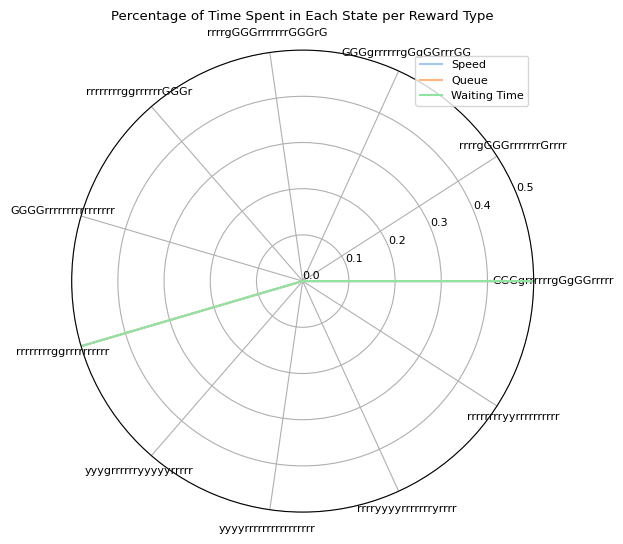

In [566]:
import matplotlib.pyplot as plt
import numpy as np

# List of dataframes and corresponding policies
configs = [(df_speed, 'Speed'), (df_queue, 'Queue'), (df_waitTime, 'Waiting Time')]

# Create a figure
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Iterate over the configurations
for df, policy in configs:
    # Calculate the time spent in each state
    time_in_state = df['tls_159_state'].value_counts()
    
    time_in_states = {}

    # Iterate over all possible states and check if they exist in the time_in_state dataframe
    for state in tls_159_states:
        if state in time_in_state.index:
            time_in_states[state] = time_in_state[state]
        else:
            time_in_states[state] = 0
    
    print(time_in_states)

   # Sort the time_in_states dictionary by values in descending order
    sorted_states = {k: v for k, v in sorted(time_in_states.items(), key=lambda item: item[1], reverse=True)}

    # Create the angles for the polar plot
    angles = np.linspace(0, 2 * np.pi, len(sorted_states), endpoint=False).tolist()

    # Make the plot circular
    angles += angles[:1]

    # Repeat the first value to close the circular plot
    values = list(sorted_states.values())
    values += values[:1]

    # Plot the data for the current configuration
    ax.plot(angles, values, label=policy)

# Add a legend
ax.legend(loc='upper right')

# Set ytick labels as decimals and limit the scale to 0.5
yticks = np.linspace(0, 0.5, num=6)
ax.set_yticks(yticks)
ax.set_yticklabels(['{:.1f}'.format(y) for y in yticks])

# Set xtick labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(list(sorted_states.keys()))

# Limit the radial axis to 0.5
ax.set_ylim(0, 0.5)

# Add a title
ax.set_title('Percentage of Time Spent in Each State per Reward Type')

plt.show()


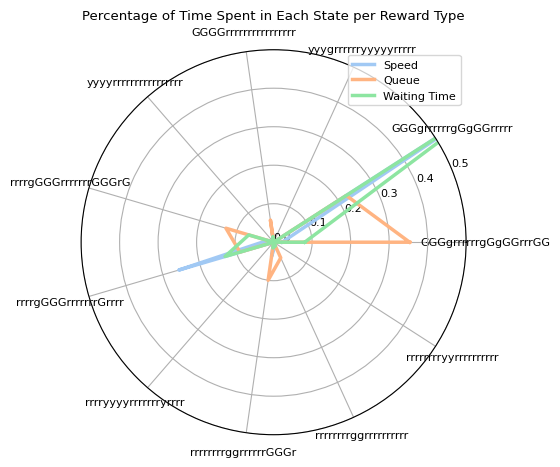

In [590]:
# -------------- tls_159 -------------- #

# List of dataframes and corresponding policies
configs = [(df_speed, 'Speed'), (df_queue, 'Queue'), (df_waitTime, 'Waiting Time')]

states = tls_159_states

# Create a figure
fig, ax = plt.subplots(figsize=(5,5), subplot_kw=dict(polar=True))

# Create the angles for the polar plot
angles = np.linspace(0, 2 * np.pi, len(states), endpoint=False).tolist()

# Make the plot circular
angles += angles[:1]

# Iterate over the configurations
for df, policy in configs:
    # Calculate the time spent in each state
    time_in_state = df['tls_159_state'].value_counts()

    # Normalize the values to range from 0 to 1
    values = [time_in_state.get(state, 0) / time_in_state.values.sum() for state in states]

    # Repeat the first value to close the circular plot
    values += values[:1]

    # Plot the data for the current configuration
    ax.plot(angles, values, label=policy, linewidth=2.5)

# Add a legend
ax.legend(loc='upper right')

# Set ytick labels as decimals and limit the scale to 0.5
yticks = np.linspace(0, 0.5, num=6)
ax.set_yticks(yticks)
ax.set_yticklabels(['{:.1f}'.format(y) for y in yticks])

# Set xtick labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(states)

# Limit the radial axis to 0.5
ax.set_ylim(0, 0.5)

# Add a title
ax.set_title('Percentage of Time Spent in Each State per Reward Type')

plt.show()


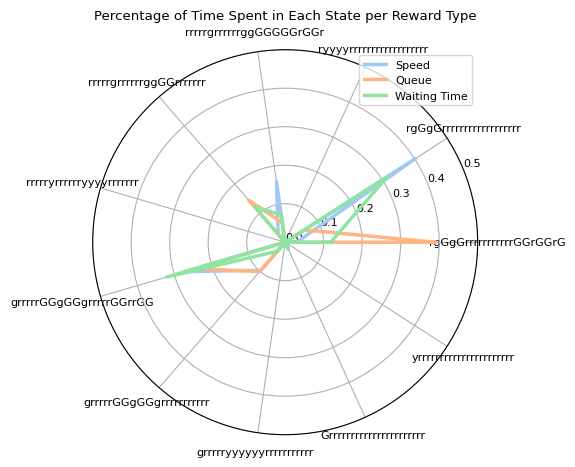

In [591]:
# -------------- tls_160 -------------- #

# List of dataframes and corresponding policies
configs = [(df_speed, 'Speed'), (df_queue, 'Queue'), (df_waitTime, 'Waiting Time')]

states = tls_160_states

# Create a figure
fig, ax = plt.subplots(figsize=(5,5), subplot_kw=dict(polar=True))

# Create the angles for the polar plot
angles = np.linspace(0, 2 * np.pi, len(states), endpoint=False).tolist()

# Make the plot circular
angles += angles[:1]

# Iterate over the configurations
for df, policy in configs:
    # Calculate the time spent in each state
    time_in_state = df['tls_160_state'].value_counts()

    # Normalize the values to range from 0 to 1
    values = [time_in_state.get(state, 0) / time_in_state.values.sum() for state in states]

    # Repeat the first value to close the circular plot
    values += values[:1]

    # Plot the data for the current configuration
    ax.plot(angles, values, label=policy, linewidth=2.5)

# Add a legend
ax.legend(loc='upper right')

# Set ytick labels as decimals and limit the scale to 0.5
yticks = np.linspace(0, 0.5, num=6)
ax.set_yticks(yticks)
ax.set_yticklabels(['{:.1f}'.format(y) for y in yticks])

# Set xtick labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(states)

# Limit the radial axis to 0.5
ax.set_ylim(0, 0.5)

# Add a title
ax.set_title('Percentage of Time Spent in Each State per Reward Type')

plt.show()


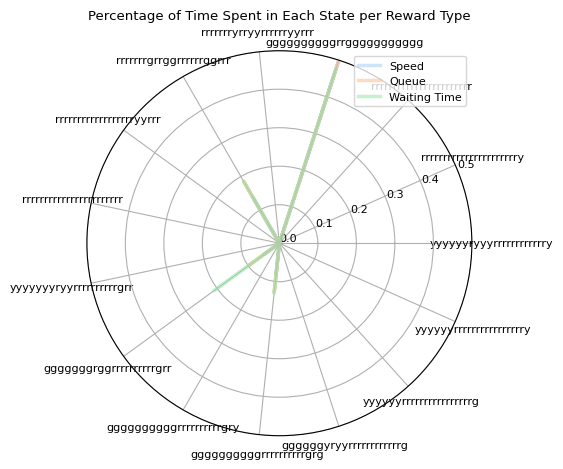

In [600]:
# -------------- tls_161 -------------- #

# List of dataframes and corresponding policies
configs = [(df_speed, 'Speed'), (df_queue, 'Queue'), (df_waitTime, 'Waiting Time')]

states = tls_161_states

# Create a figure
fig, ax = plt.subplots(figsize=(5,5), subplot_kw=dict(polar=True))

# Create the angles for the polar plot
angles = np.linspace(0, 2 * np.pi, len(states), endpoint=False).tolist()

# Make the plot circular
angles += angles[:1]

# Iterate over the configurations
for df, policy in configs:
    # Calculate the time spent in each state
    time_in_state = df['tls_161_state'].value_counts()

    # Normalize the values to range from 0 to 1
    values = [time_in_state.get(state, 0) / time_in_state.values.sum() for state in states]

    # Repeat the first value to close the circular plot
    values += values[:1]

    # Plot the data for the current configuration
    ax.plot(angles, values, label=policy, linewidth=2.5, alpha=0.5)

# Add a legend
ax.legend(loc='upper right')

# Set ytick labels as decimals and limit the scale to 0.5
yticks = np.linspace(0, 0.5, num=6)
ax.set_yticks(yticks)
ax.set_yticklabels(['{:.1f}'.format(y) for y in yticks])

# Set xtick labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(states)

# Limit the radial axis to 0.5
ax.set_ylim(0, 0.5)

# Add a title
ax.set_title('Percentage of Time Spent in Each State per Reward Type')

plt.show()


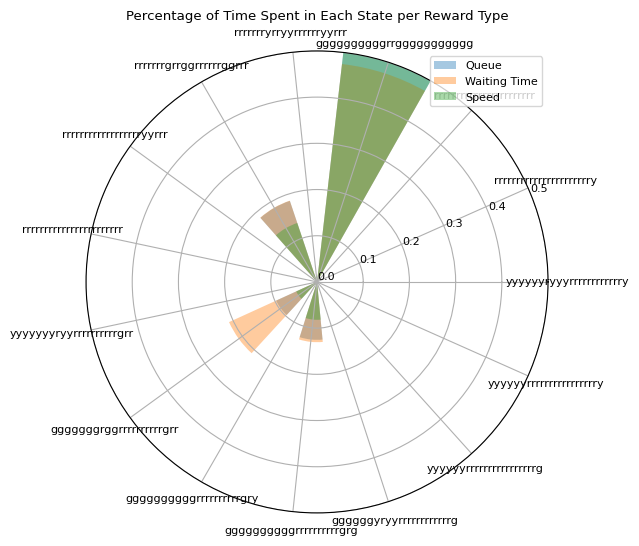

In [594]:
### barplot

# List of dataframes and corresponding policies
configs = [(df_queue, 'Queue'), (df_waitTime, 'Waiting Time'), (df_speed, 'Speed')]

states = tls_161_states

# Define a custom color palette with distinct colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create a figure
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Create the angles for the polar plot
angles = np.linspace(0, 2 * np.pi, len(states), endpoint=False).tolist()

# Make the plot circular
angles += angles[:1]

# Iterate over the configurations
for i, (df, policy) in enumerate(configs):
    # Calculate the time spent in each state
    time_in_state = df['tls_161_state'].value_counts()

    # Normalize the values to range from 0 to 1
    values = [time_in_state.get(state, 0) / time_in_state.values.sum() for state in states]

    # Plot the data for the current configuration as bars with custom colors
    ax.bar(angles[:-1], values, width=0.4, label=policy, alpha=0.4, color=colors[i % len(colors)])

# Add a legend
ax.legend(loc='upper right')

# Set ytick labels as decimals and limit the scale to 0.5
yticks = np.linspace(0, 0.5, num=6)
ax.set_yticks(yticks)
ax.set_yticklabels(['{:.1f}'.format(y) for y in yticks])

# Set xtick labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(states)

# Limit the radial axis to 0.5
ax.set_ylim(0, 0.5)

# Add a title
ax.set_title('Percentage of Time Spent in Each State per Reward Type')

plt.show()


In [589]:
### barplot

# List of dataframes and corresponding policies
configs = [(df_speed, 'Speed'), (df_queue, 'Queue'), (df_waitTime, 'Waiting Time')]

states = tls_159_states

# Define a custom color palette with distinct colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create a figure
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Create the angles for the polar plot
angles = np.linspace(0, 2 * np.pi, len(states), endpoint=False).tolist()

# Make the plot circular
angles += angles[:1]

# Iterate over the configurations
for i, (df, policy) in enumerate(configs):
    # Calculate the time spent in each state
    time_in_state = df['tls_159_state'].value_counts()

    # Normalize the values to range from 0 to 1
    values = [time_in_state.get(state, 0) / time_in_state.values.sum() for state in states]

    # Plot the data for the current configuration as bars with custom colors
    ax.bar(angles[:-1], values, width=0.4, label=policy, alpha=0.4, color=colors[i % len(colors)])

# Add a legend
ax.legend(loc='upper right')

# Set ytick labels as decimals and limit the scale to 0.5
yticks = np.linspace(0, 0.5, num=6)
ax.set_yticks(yticks)
ax.set_yticklabels(['{:.1f}'.format(y) for y in yticks])

# Set xtick labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(states)

# Limit the radial axis to 0.5
ax.set_ylim(0, 0.5)

# Add a title
ax.set_title('Percentage of Time Spent in Each State per Reward Type')

plt.show()


### Longer Trained Model (Waiting Time)

In [ ]:
inputdir = '../src/data/model_outputs/'

wt_200 = pd.DataFrame() # create empty dataframe
wt_400 = pd.DataFrame() # create empty dataframe
wt_900 = pd.DataFrame() # create empty dataframe

i200 = 1
i400 = 1
i900 = 1

# iterate over all files in the folder for each reward type
for file in os.listdir(inputdir):
    
    # create dataframe for all files that start with avg_speed
    if file.startswith('diff-waiting-time_900000'):
        temp_df900 = pd.read_csv(os.path.join(inputdir, file))
        temp_df900['episode'] = i900 # add episode column
        wt_900 = wt_900.append(temp_df900, ignore_index=True)
        i900 += 1
        
    elif file.startswith('diff-waiting-time_400000'):
        temp_df400 = pd.read_csv(os.path.join(inputdir, file))
        temp_df400['episode'] = i400
        wt_400 = wt_400.append(temp_df400, ignore_index=True)
        i400 += 1
        
    elif file.startswith('waitingTime_200000'):
        temp_df200 = pd.read_csv(os.path.join(inputdir, file))
        temp_df200['episode'] = i200
        wt_200 = wt_200.append(temp_df200, ignore_index=True)
        i200 += 1

wt_200 = wt_200[wt_200['system_local_#vehicles'] != 0]
wt_400 = wt_400[wt_400['system_local_#vehicles'] != 0]        
wt_900 = wt_900[wt_900['system_local_#vehicles'] != 0]
       

In [7]:
print('200')
print(wt_200[['system_local_CO2', 'system_local_CO', 'system_local_HC','system_local_PMx','system_local_NOx','system_local_noise_emission']].mean())

print('400')
print(wt_400[['system_local_CO2', 'system_local_CO', 'system_local_HC','system_local_PMx','system_local_NOx','system_local_noise_emission']].mean())

print('900')
print(wt_900[['system_local_CO2', 'system_local_CO', 'system_local_HC','system_local_PMx','system_local_NOx','system_local_noise_emission']].mean())

200
system_local_CO2               92792.792200
system_local_CO                 2598.377294
system_local_HC                   13.609493
system_local_PMx                  13.934162
system_local_NOx                 536.264122
system_local_noise_emission      367.880482
dtype: float64
400
system_local_CO2               91750.617289
system_local_CO                 2623.774478
system_local_HC                   13.844302
system_local_PMx                  13.485825
system_local_NOx                 518.663999
system_local_noise_emission      359.730199
dtype: float64
900
system_local_CO2               90507.208360
system_local_CO                 2497.701700
system_local_HC                   12.782290
system_local_PMx                  13.622126
system_local_NOx                 526.766927
system_local_noise_emission      344.780421
dtype: float64


--> values are too close for plots to show differnces